# Simulating the LHC
N. Karastathis

The idea of this notebook is to data mine the most precise information in order to be used as input for simulating the DA of the LHC and then comparing with the observed lifetime.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle, gzip, sys, os
import pjlsa
lsa = pjlsa.LSAClient()


import cl2pd
from cl2pd import importData
from cl2pd import plotFunctions
from cl2pd import dotdict
from cl2pd import bbFunctions
from cl2pd import variablesDF
cals=importData.cals
from cl2pd import importLSA

In [3]:
%matplotlib inline

In [4]:
sns.set_style("ticks")
# Font
plt.rcParams['xtick.labelsize']  = 115
# Grid
plt.rcParams['grid.color']       =   'k'
plt.rcParams['grid.linestyle']   =   ':'
plt.rcParams['grid.linewidth']   =   0.9
plt.rcParams['grid.alpha']       =   1.0
plt.rcParams['axes.labelsize']   = 24
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['xtick.labelsize']  = 30
plt.rcParams['ytick.labelsize']  = 30
plt.rcParams['legend.fontsize']  = 16
plt.rcParams['figure.titlesize'] = 20

Let's select a few fills.

We can select 
- 2017 BCMS : fill 6050 seems ok (40cm b*)
- 2017 8b4e : fill 6191 seems ok (40cm b* not BCS)
- 2018 BCMS (/w var crossing)  : 7270
- 2018 BCMS (/w const crossing): 7266

For these we have to take into account the evolution of 
- intensity 
- emittance
- chromaticity
- octupole current
- crossing angle
- beta*
- tune!

We first need to study the bbb encounters to identify the LR dominated bunches.

In [5]:
fill_BCMS_2017        = 6050
fill_8b4e_2017        = 6174 # bad emittance try 6174
fill_BCMS_xing_2018   = 7270
fill_BCMS_noxing_2018 = 7266

In [6]:
nLR_nsideD1 = 5
nLR = [21, 20, 20]

## 1.1) BCMS 2017 - 6050

In [16]:
print fill_BCMS_2017

6050


In [17]:
filled_slots_b1, filled_slots_b2, slots_coll_b1, slots_coll_b2, slots_noncoll_b1, slots_noncoll_b2, b1_fill_pattern, b2_fill_pattern = getFillingScheme(fill_BCMS_2017)
BBMATRIX = bbFunctions.computeBBMatrix(nLR)
b1_collisionScheduleDF = bbFunctions.B1CollisionScheduleDF(b1_fill_pattern, b2_fill_pattern, nLR)
b2_collisionScheduleDF = bbFunctions.B2CollisionScheduleDF(b1_fill_pattern, b2_fill_pattern, nLR)
# Collides in IP2
# -- B1
b1_collisionScheduleDF['collidesIP2'] = b1_collisionScheduleDF["HO partner in ALICE"].fillna(-1)
b1_collisionScheduleDF['collidesIP2'][b1_collisionScheduleDF['collidesIP2']>=0] = 2
# -- B2
b2_collisionScheduleDF['collidesIP2'] = b2_collisionScheduleDF["HO partner in ALICE"].fillna(-1)
b2_collisionScheduleDF['collidesIP2'][b2_collisionScheduleDF['collidesIP2']>=0] = 2
# Collides in IP8
# -- B1
b1_collisionScheduleDF['collidesIP8'] = b1_collisionScheduleDF["HO partner in LHCB"].fillna(-1)
b1_collisionScheduleDF['collidesIP8'][b1_collisionScheduleDF['collidesIP8']>=0] = 3
# -- B2
b2_collisionScheduleDF['collidesIP8'] = b2_collisionScheduleDF["HO partner in LHCB"].fillna(-1)
b2_collisionScheduleDF['collidesIP8'][b2_collisionScheduleDF['collidesIP8']>=0] = 3
# Collides in IP1/5
# -- B1
b1_collisionScheduleDF['collidesIP1'] = b1_collisionScheduleDF["HO partner in ATLAS/CMS"].fillna(-1)
b1_collisionScheduleDF['collidesIP1'][b1_collisionScheduleDF['collidesIP1']>=0] = 1
# -- B2
b2_collisionScheduleDF['collidesIP1'] = b2_collisionScheduleDF["HO partner in ATLAS/CMS"].fillna(-1)
b2_collisionScheduleDF['collidesIP1'][b2_collisionScheduleDF['collidesIP1']>=0] = 1
####--------------
b1_slots_coll_fBCMS2017 = b1_collisionScheduleDF.index.values
b2_slots_coll_fBCMS2017 = b2_collisionScheduleDF.index.values
b1_coll_IP8_fBCMS2017   = b1_collisionScheduleDF['# of LR in LHCB'].values
b2_coll_IP8_fBCMS2017   = b2_collisionScheduleDF['# of LR in LHCB'].values
b1_coll_IP2_fBCMS2017   = b1_collisionScheduleDF['# of LR in ALICE'].values
b2_coll_IP2_fBCMS2017   = b2_collisionScheduleDF['# of LR in ALICE'].values
b1_coll_IP1_fBCMS2017   = b1_collisionScheduleDF['# of LR in ATLAS/CMS'].values
b2_coll_IP1_fBCMS2017   = b2_collisionScheduleDF['# of LR in ATLAS/CMS'].values

---------- FILL 6050 ----------
B1 slots               : 2556
B2 slots               : 2556
B1 colliding slots     : 2544
B2 colliding slots     : 2544
B1 non-colliding slots : 12
B2 non-colliding slots : 12


## 1.2) 8b+4e 2017 - 6360

In [18]:
print fill_8b4e_2017

6174


In [19]:
filled_slots_b1, filled_slots_b2, slots_coll_b1, slots_coll_b2, slots_noncoll_b1, slots_noncoll_b2, b1_fill_pattern, b2_fill_pattern = getFillingScheme(fill_8b4e_2017)
BBMATRIX = bbFunctions.computeBBMatrix(nLR)
b1_collisionScheduleDF = bbFunctions.B1CollisionScheduleDF(b1_fill_pattern, b2_fill_pattern, nLR)
b2_collisionScheduleDF = bbFunctions.B2CollisionScheduleDF(b1_fill_pattern, b2_fill_pattern, nLR)
# Collides in IP2
# -- B1
b1_collisionScheduleDF['collidesIP2'] = b1_collisionScheduleDF["HO partner in ALICE"].fillna(-1)
b1_collisionScheduleDF['collidesIP2'][b1_collisionScheduleDF['collidesIP2']>=0] = 2
# -- B2
b2_collisionScheduleDF['collidesIP2'] = b2_collisionScheduleDF["HO partner in ALICE"].fillna(-1)
b2_collisionScheduleDF['collidesIP2'][b2_collisionScheduleDF['collidesIP2']>=0] = 2
# Collides in IP8
# -- B1
b1_collisionScheduleDF['collidesIP8'] = b1_collisionScheduleDF["HO partner in LHCB"].fillna(-1)
b1_collisionScheduleDF['collidesIP8'][b1_collisionScheduleDF['collidesIP8']>=0] = 3
# -- B2
b2_collisionScheduleDF['collidesIP8'] = b2_collisionScheduleDF["HO partner in LHCB"].fillna(-1)
b2_collisionScheduleDF['collidesIP8'][b2_collisionScheduleDF['collidesIP8']>=0] = 3
# Collides in IP1/5
# -- B1
b1_collisionScheduleDF['collidesIP1'] = b1_collisionScheduleDF["HO partner in ATLAS/CMS"].fillna(-1)
b1_collisionScheduleDF['collidesIP1'][b1_collisionScheduleDF['collidesIP1']>=0] = 1
# -- B2
b2_collisionScheduleDF['collidesIP1'] = b2_collisionScheduleDF["HO partner in ATLAS/CMS"].fillna(-1)
b2_collisionScheduleDF['collidesIP1'][b2_collisionScheduleDF['collidesIP1']>=0] = 1
####--------------
b1_slots_coll_f8b4e2017 = b1_collisionScheduleDF.index.values
b2_slots_coll_f8b4e2017 = b2_collisionScheduleDF.index.values
b1_coll_IP8_f8b4e2017   = b1_collisionScheduleDF['# of LR in LHCB'].values
b2_coll_IP8_f8b4e2017   = b2_collisionScheduleDF['# of LR in LHCB'].values
b1_coll_IP2_f8b4e2017   = b1_collisionScheduleDF['# of LR in ALICE'].values
b2_coll_IP2_f8b4e2017   = b2_collisionScheduleDF['# of LR in ALICE'].values
b1_coll_IP1_f8b4e2017   = b1_collisionScheduleDF['# of LR in ATLAS/CMS'].values
b2_coll_IP1_f8b4e2017   = b2_collisionScheduleDF['# of LR in ATLAS/CMS'].values

---------- FILL 6174 ----------
B1 slots               : 1916
B2 slots               : 1916
B1 colliding slots     : 1909
B2 colliding slots     : 1909
B1 non-colliding slots : 7
B2 non-colliding slots : 7


## 1.3) BCMS 2018 var xing - 7270

In [20]:
print fill_BCMS_xing_2018

7270


In [21]:
filled_slots_b1, filled_slots_b2, slots_coll_b1, slots_coll_b2, slots_noncoll_b1, slots_noncoll_b2, b1_fill_pattern, b2_fill_pattern = getFillingScheme(fill_BCMS_xing_2018)
BBMATRIX = bbFunctions.computeBBMatrix(nLR)
b1_collisionScheduleDF = bbFunctions.B1CollisionScheduleDF(b1_fill_pattern, b2_fill_pattern, nLR)
b2_collisionScheduleDF = bbFunctions.B2CollisionScheduleDF(b1_fill_pattern, b2_fill_pattern, nLR)
# Collides in IP2
# -- B1
b1_collisionScheduleDF['collidesIP2'] = b1_collisionScheduleDF["HO partner in ALICE"].fillna(-1)
b1_collisionScheduleDF['collidesIP2'][b1_collisionScheduleDF['collidesIP2']>=0] = 2
# -- B2
b2_collisionScheduleDF['collidesIP2'] = b2_collisionScheduleDF["HO partner in ALICE"].fillna(-1)
b2_collisionScheduleDF['collidesIP2'][b2_collisionScheduleDF['collidesIP2']>=0] = 2
# Collides in IP8
# -- B1
b1_collisionScheduleDF['collidesIP8'] = b1_collisionScheduleDF["HO partner in LHCB"].fillna(-1)
b1_collisionScheduleDF['collidesIP8'][b1_collisionScheduleDF['collidesIP8']>=0] = 3
# -- B2
b2_collisionScheduleDF['collidesIP8'] = b2_collisionScheduleDF["HO partner in LHCB"].fillna(-1)
b2_collisionScheduleDF['collidesIP8'][b2_collisionScheduleDF['collidesIP8']>=0] = 3
# Collides in IP1/5
# -- B1
b1_collisionScheduleDF['collidesIP1'] = b1_collisionScheduleDF["HO partner in ATLAS/CMS"].fillna(-1)
b1_collisionScheduleDF['collidesIP1'][b1_collisionScheduleDF['collidesIP1']>=0] = 1
# -- B2
b2_collisionScheduleDF['collidesIP1'] = b2_collisionScheduleDF["HO partner in ATLAS/CMS"].fillna(-1)
b2_collisionScheduleDF['collidesIP1'][b2_collisionScheduleDF['collidesIP1']>=0] = 1
####--------------
b1_slots_coll_fBCMSxing2018 = b1_collisionScheduleDF.index.values
b2_slots_coll_fBCMSxing2018 = b2_collisionScheduleDF.index.values
b1_coll_IP8_fBCMSxing2018   = b1_collisionScheduleDF['# of LR in LHCB'].values
b2_coll_IP8_fBCMSxing2018   = b2_collisionScheduleDF['# of LR in LHCB'].values
b1_coll_IP2_fBCMSxing2018   = b1_collisionScheduleDF['# of LR in ALICE'].values
b2_coll_IP2_fBCMSxing2018   = b2_collisionScheduleDF['# of LR in ALICE'].values
b1_coll_IP1_fBCMSxing2018   = b1_collisionScheduleDF['# of LR in ATLAS/CMS'].values
b2_coll_IP1_fBCMSxing2018   = b2_collisionScheduleDF['# of LR in ATLAS/CMS'].values

---------- FILL 7270 ----------
B1 slots               : 2556
B2 slots               : 2556
B1 colliding slots     : 2544
B2 colliding slots     : 2544
B1 non-colliding slots : 12
B2 non-colliding slots : 12


## 1.4) BCMS 2018 const xing - 7266

In [22]:
print fill_BCMS_noxing_2018

7266


In [23]:
filled_slots_b1, filled_slots_b2, slots_coll_b1, slots_coll_b2, slots_noncoll_b1, slots_noncoll_b2, b1_fill_pattern, b2_fill_pattern = getFillingScheme(fill_BCMS_noxing_2018)
BBMATRIX = bbFunctions.computeBBMatrix(nLR)
b1_collisionScheduleDF = bbFunctions.B1CollisionScheduleDF(b1_fill_pattern, b2_fill_pattern, nLR)
b2_collisionScheduleDF = bbFunctions.B2CollisionScheduleDF(b1_fill_pattern, b2_fill_pattern, nLR)
# Collides in IP2
# -- B1
b1_collisionScheduleDF['collidesIP2'] = b1_collisionScheduleDF["HO partner in ALICE"].fillna(-1)
b1_collisionScheduleDF['collidesIP2'][b1_collisionScheduleDF['collidesIP2']>=0] = 2
# -- B2
b2_collisionScheduleDF['collidesIP2'] = b2_collisionScheduleDF["HO partner in ALICE"].fillna(-1)
b2_collisionScheduleDF['collidesIP2'][b2_collisionScheduleDF['collidesIP2']>=0] = 2
# Collides in IP8
# -- B1
b1_collisionScheduleDF['collidesIP8'] = b1_collisionScheduleDF["HO partner in LHCB"].fillna(-1)
b1_collisionScheduleDF['collidesIP8'][b1_collisionScheduleDF['collidesIP8']>=0] = 3
# -- B2
b2_collisionScheduleDF['collidesIP8'] = b2_collisionScheduleDF["HO partner in LHCB"].fillna(-1)
b2_collisionScheduleDF['collidesIP8'][b2_collisionScheduleDF['collidesIP8']>=0] = 3
# Collides in IP1/5
# -- B1
b1_collisionScheduleDF['collidesIP1'] = b1_collisionScheduleDF["HO partner in ATLAS/CMS"].fillna(-1)
b1_collisionScheduleDF['collidesIP1'][b1_collisionScheduleDF['collidesIP1']>=0] = 1
# -- B2
b2_collisionScheduleDF['collidesIP1'] = b2_collisionScheduleDF["HO partner in ATLAS/CMS"].fillna(-1)
b2_collisionScheduleDF['collidesIP1'][b2_collisionScheduleDF['collidesIP1']>=0] = 1
####--------------
b1_slots_coll_fBCMSNoxing2018 = b1_collisionScheduleDF.index.values
b2_slots_coll_fBCMSNoxing2018 = b2_collisionScheduleDF.index.values
b1_coll_IP8_fBCMSNoxing2018   = b1_collisionScheduleDF['# of LR in LHCB'].values
b2_coll_IP8_fBCMSNoxing2018   = b2_collisionScheduleDF['# of LR in LHCB'].values
b1_coll_IP2_fBCMSNoxing2018   = b1_collisionScheduleDF['# of LR in ALICE'].values
b2_coll_IP2_fBCMSNoxing2018   = b2_collisionScheduleDF['# of LR in ALICE'].values
b1_coll_IP1_fBCMSNoxing2018   = b1_collisionScheduleDF['# of LR in ATLAS/CMS'].values
b2_coll_IP1_fBCMSNoxing2018   = b2_collisionScheduleDF['# of LR in ATLAS/CMS'].values

---------- FILL 7266 ----------
B1 slots               : 2556
B2 slots               : 2556
B1 colliding slots     : 2544
B2 colliding slots     : 2544
B1 non-colliding slots : 12
B2 non-colliding slots : 12


---

## 2) Plot

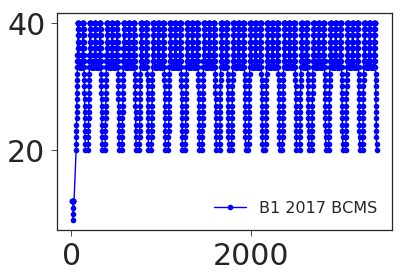

In [24]:
plt.plot(b1_slots_coll_fBCMS2017, b1_coll_IP1_fBCMS2017, 'bo-' , label='B1 2017 BCMS')
plt.legend()

The B1 2017 one is delayed by 6 slots compared to 2018!


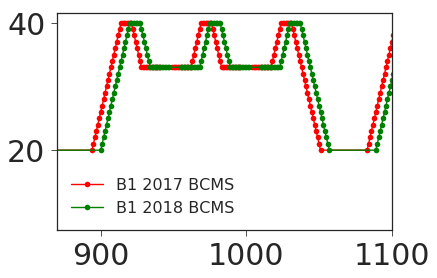

In [25]:
plt.plot(b1_slots_coll_fBCMS2017, b1_coll_IP1_fBCMS2017, 'ro-' , label='B1 2017 BCMS')
plt.plot(b1_slots_coll_fBCMSxing2018, b1_coll_IP1_fBCMSxing2018, 'go-' , label='B1 2018 BCMS')
plt.xlim(870, 1100)
plt.legend()
print "The B1 2017 one is delayed by 6 slots compared to 2018!"

The B2 2017 one is delayed by 6 slots compared to 2018!


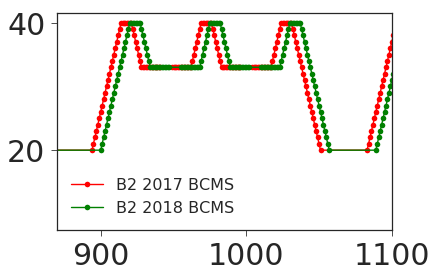

In [26]:
plt.plot(b2_slots_coll_fBCMS2017,     b2_coll_IP1_fBCMS2017,     'ro-' , label='B2 2017 BCMS')
plt.plot(b2_slots_coll_fBCMSxing2018, b2_coll_IP1_fBCMSxing2018, 'go-' , label='B2 2018 BCMS')
plt.xlim(870, 1100)
plt.legend()
print "The B2 2017 one is delayed by 6 slots compared to 2018!"

In 2018 with/without xing the fills have the same pattern


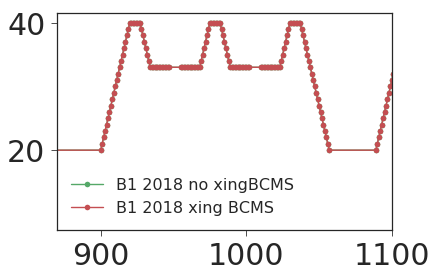

In [27]:
plt.plot(b1_slots_coll_fBCMSNoxing2018, b1_coll_IP1_fBCMSNoxing2018, 'C1o-' , label='B1 2018 no xingBCMS')
plt.plot(b1_slots_coll_fBCMSxing2018, b1_coll_IP1_fBCMSxing2018, 'C2o-' , label='B1 2018 xing BCMS')
plt.xlim(870, 1100)
plt.legend()
print "In 2018 with/without xing the fills have the same pattern"

The B1 2017 one is delayed by 6 slots compared to 2018!


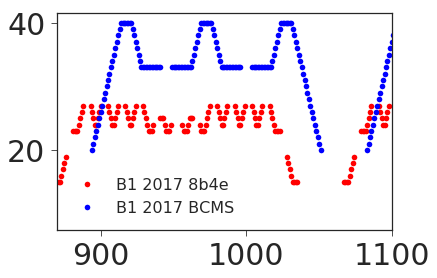

In [28]:
plt.plot(b1_slots_coll_f8b4e2017, b1_coll_IP1_f8b4e2017, 'ro' , label='B1 2017 8b4e')
plt.plot(b1_slots_coll_fBCMS2017, b1_coll_IP1_fBCMS2017, 'bo' , label='B1 2017 BCMS')

plt.xlim(870, 1100)
plt.legend()
print "The B1 2017 one is delayed by 6 slots compared to 2018!"

---

### For 2018 we could select

- Beam 1:
  - Bunches : [195, 215, 222, 325, 332, 352]
  - nLR_IP1 : [20, 40, 40, 40, 40, 20]
  - nLR_IP2 : [19, 38, 42, 38, 42, 24]
  - nLR_IP8 : [10, 28, 35, 33, 35, 32]

- Beam 2:
  - Bunches : [195, 215, 222, 325, 332, 352]
  - nLR_IP1 : [20, 40, 40, 40, 40, 20]
  - nLR_IP2 : [13, 32, 39, 35, 39, 30]
  - nLR_IP8 : [20, 40, 40, 40, 40, 20]

(190, 355)

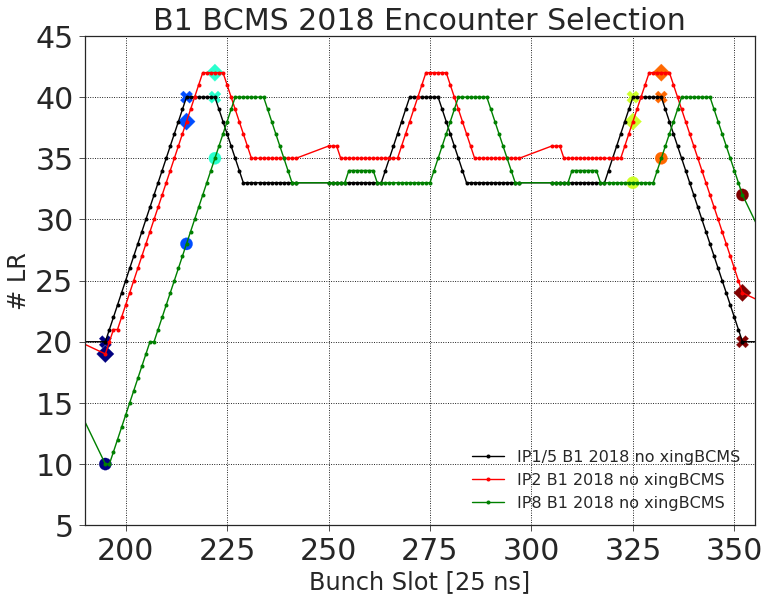

In [251]:
f = plt.figure(figsize=(12,9))
plt.plot(b1_slots_coll_fBCMSNoxing2018, b1_coll_IP1_fBCMSNoxing2018, 'k.-' , label='IP1/5 B1 2018 no xingBCMS', markersize=8)
plt.plot(b1_slots_coll_fBCMSNoxing2018, b1_coll_IP2_fBCMSNoxing2018, 'r.-' , label='IP2 B1 2018 no xingBCMS', markersize=8)
plt.plot(b1_slots_coll_fBCMSNoxing2018, b1_coll_IP8_fBCMSNoxing2018, 'g.-' , label='IP8 B1 2018 no xingBCMS', markersize=8)
plt.grid('on')
# plt.xlim(895, 1060)
#plt.ylim(18, 45)
plt.ylim(5, 45)
# setAxisMaxLocator(plt.gca(), 'y', 40)
# plt.setp(plt.gca().get_yticklabels(), fontsize=9)


plt.legend()

plt.scatter([195, 215, 222, 325, 332, 352], [20, 40, 40, 40, 40, 20], c=np.arange(6), cmap=plt.cm.jet, s=150, marker='X' )
plt.scatter([195, 215, 222, 325, 332, 352], [19, 38, 42, 38, 42, 24], c=np.arange(6), cmap=plt.cm.jet, s=150, marker='D' ) #IP2
plt.scatter([195, 215, 222, 325, 332, 352], [10, 28, 35, 33, 35, 32], c=np.arange(6), cmap=plt.cm.jet, s=150, marker='o' ) #IP8
plt.xlabel("Bunch Slot [25 ns]")
plt.ylabel("# LR")
plt.title("B1 BCMS 2018 Encounter Selection", fontsize=30)


plt.xlim(190,355)

(190, 355)

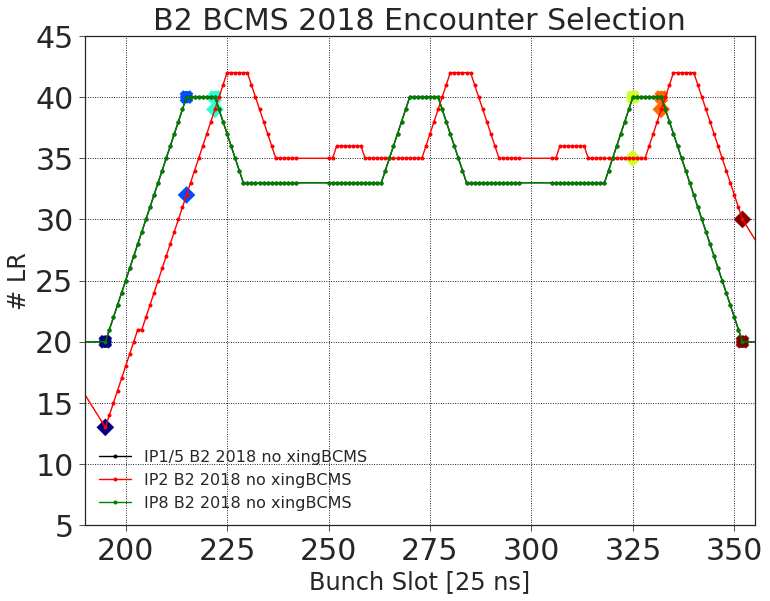

In [250]:
f = plt.figure(figsize=(12,9))
plt.plot(b2_slots_coll_fBCMSNoxing2018, b2_coll_IP1_fBCMSNoxing2018, 'k.-' , label='IP1/5 B2 2018 no xingBCMS', markersize=8)
plt.plot(b2_slots_coll_fBCMSNoxing2018, b2_coll_IP2_fBCMSNoxing2018, 'r.-' , label='IP2 B2 2018 no xingBCMS', markersize=8)
plt.plot(b2_slots_coll_fBCMSNoxing2018, b2_coll_IP8_fBCMSNoxing2018, 'g.-' , label='IP8 B2 2018 no xingBCMS', markersize=8)


plt.grid('on')
# plt.xlim(895, 1060)
#plt.ylim(18, 45)
plt.ylim(5, 45)
# setAxisMaxLocator(plt.gca(), 'y', 40)
# plt.setp(plt.gca().get_yticklabels(), fontsize=9)
plt.scatter([195, 215, 222, 325, 332, 352], [20, 40, 40, 40, 40, 20], c=np.arange(6), cmap=plt.cm.jet, s=180, marker='X' )
plt.scatter([195, 215, 222, 325, 332, 352], [13, 32, 39, 35, 39, 30], c=np.arange(6), cmap=plt.cm.jet, s=150, marker='D' ) #IP2
plt.scatter([195, 215, 222, 325, 332, 352], [20, 40, 40, 40, 40, 20], c=np.arange(6), cmap=plt.cm.jet, s=150, marker='o' ) #IP8
plt.xlabel("Bunch Slot [25 ns]")
plt.ylabel("# LR")
plt.title("B2 BCMS 2018 Encounter Selection", fontsize=30)
plt.legend()

# plt.xlim(300,355)
plt.xlim(190,355)

### For 2017 BCMS
The same bunches correspond to :

- Beam 1:
  - Bunches : [189, 209, 216, 319, 326, 346]
  - nLR_IP1 : [20, 40, 40, 40, 40, 20]
  - nLR_IP2 : [19, 38, 42, 38, 42, 24]
  - nLR_IP8 : [10, 28, 35, 33, 35, 32]

- Beam 2:
  - Bunches : [189, 209, 216, 319, 326, 346]
  - nLR_IP1 : [20, 40, 40, 40, 40, 20]
  - nLR_IP2 : [13, 32, 39, 35, 39, 30]
  - nLR_IP8 : [20, 40, 40, 40, 40, 20]



(180, 355)

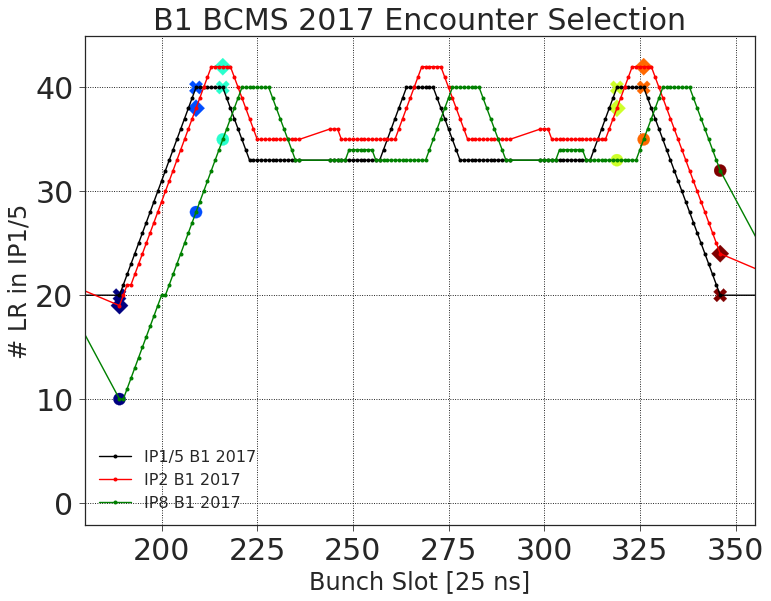

In [108]:
f = plt.figure(figsize=(12,9))
plt.plot(b1_slots_coll_fBCMS2017, b1_coll_IP1_fBCMS2017, 'k.-' , label='IP1/5 B1 2017', markersize=8)
plt.plot(b1_slots_coll_fBCMS2017, b1_coll_IP2_fBCMS2017, 'r.-' , label='IP2 B1 2017', markersize=8)
plt.plot(b1_slots_coll_fBCMS2017, b1_coll_IP8_fBCMS2017, 'g.-' , label='IP8 B1 2017', markersize=8)
plt.grid('on')
# plt.xlim(890, 1060)
# plt.ylim(18, 45)
plt.scatter([189, 209, 216, 319, 326, 346], [20, 40, 40, 40, 40, 20], c=np.arange(6), cmap=plt.cm.jet, s=180, marker='X' )
plt.scatter([189, 209, 216, 319, 326, 346], [19, 38, 42, 38, 42, 24], c=np.arange(6), cmap=plt.cm.jet, s=150, marker='D' )
plt.scatter([189, 209, 216, 319, 326, 346], [10, 28, 35, 33, 35, 32], c=np.arange(6), cmap=plt.cm.jet, s=150, marker='o' )

plt.xlabel("Bunch Slot [25 ns]")
plt.ylabel("# LR in IP1/5")
plt.title("B1 BCMS 2017 Encounter Selection", fontsize=30)
plt.legend()
# plt.xlim(300,355)

plt.xlim(180,355)

(180, 355)

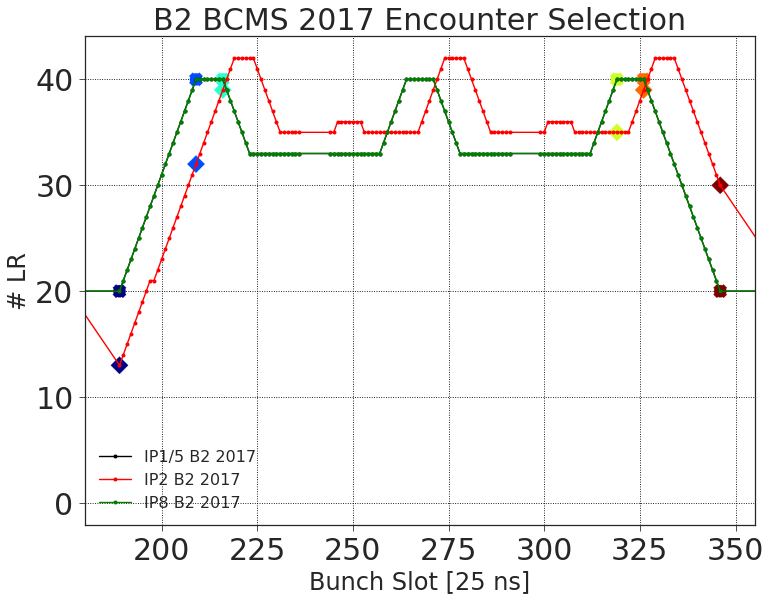

In [126]:
f = plt.figure(figsize=(12,9))
plt.plot(b2_slots_coll_fBCMS2017, b2_coll_IP1_fBCMS2017, 'k.-' , label='IP1/5 B2 2017', markersize=8)
plt.plot(b2_slots_coll_fBCMS2017, b2_coll_IP2_fBCMS2017, 'r.-' , label='IP2 B2 2017', markersize=8)
plt.plot(b2_slots_coll_fBCMS2017, b2_coll_IP8_fBCMS2017, 'g.-' , label='IP8 B2 2017', markersize=8)
plt.grid('on')
# plt.xlim(890, 1060)
# plt.ylim(18, 45)
plt.scatter([189, 209, 216, 319, 326, 346], [20, 40, 40, 40, 40, 20], c=np.arange(6), cmap=plt.cm.jet, s=180, marker='X' )
plt.scatter([189, 209, 216, 319, 326, 346], [13, 32, 39, 35, 39, 30], c=np.arange(6), cmap=plt.cm.jet, s=150, marker='D' )
plt.scatter([189, 209, 216, 319, 326, 346], [20, 40, 40, 40, 40, 20], c=np.arange(6), cmap=plt.cm.jet, s=150, marker='o' )

plt.xlabel("Bunch Slot [25 ns]")
plt.ylabel("# LR")
plt.title("B2 BCMS 2017 Encounter Selection", fontsize=30)
plt.legend()
# plt.xlim(300,355)

plt.xlim(180,355)

### For 2017 8b4e
The same bunches correspond to :

- Beam 1:
  - Bunches : [161, 173, 180, 185, 235, 267, 308, 315, 327]
  - nLR_IP1 : [15, 23, 27, 27, 25, 27, 27, 23, 15]
  - nLR_IP2 : [12, 15, 17, 23, 30, 25, 31, 26, 24]
  - nLR_IP8 : [24, 16, 14, 9,  25, 29, 24, 27, 27]

- Beam 2:
  - Bunches : [161, 173, 180, 185, 235, 267, 308, 315, 327]
  - nLR_IP1 : [15, 23, 27, 27, 25, 27, 27, 23, 15]
  - nLR_IP2 : [23, 15, 12, 9,  26, 27, 24, 31, 31]
  - nLR_IP8 : [9, 15, 19, 23,  25, 25, 27, 27, 23]


(150, 330)

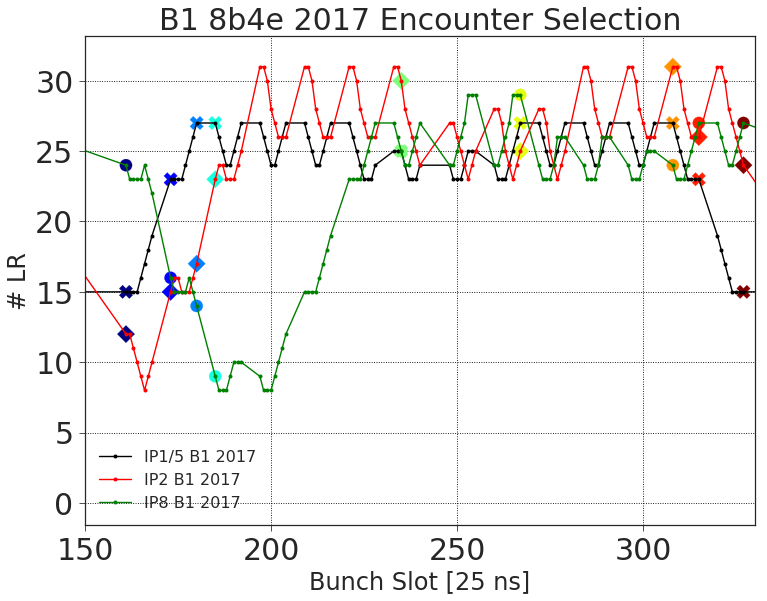

In [209]:
f = plt.figure(figsize=(12,9))
plt.plot(b1_slots_coll_f8b4e2017, b1_coll_IP1_f8b4e2017, 'k.-' , label='IP1/5 B1 2017', markersize=8)
plt.plot(b1_slots_coll_f8b4e2017, b1_coll_IP2_f8b4e2017, 'r.-' , label='IP2 B1 2017', markersize=8)
plt.plot(b1_slots_coll_f8b4e2017, b1_coll_IP8_f8b4e2017, 'g.-' , label='IP8 B1 2017', markersize=8)
plt.grid('on')
# plt.xlim(890, 1060)
# plt.ylim(18, 45)
plt.scatter([161, 173, 180, 185, 235, 267, 308, 315, 327], [15, 23, 27, 27, 25, 27, 27, 23, 15], c=np.arange(9), cmap=plt.cm.jet, s=180, marker='X' )
plt.scatter([161, 173, 180, 185, 235, 267, 308, 315, 327], [12, 15, 17, 23, 30, 25, 31, 26, 24], c=np.arange(9), cmap=plt.cm.jet, s=150, marker='D' )
plt.scatter([161, 173, 180, 185, 235, 267, 308, 315, 327], [24, 16, 14, 9,  25, 29, 24, 27, 27], c=np.arange(9), cmap=plt.cm.jet, s=150, marker='o' )

plt.xlabel("Bunch Slot [25 ns]")
plt.ylabel("# LR")
plt.title("B1 8b4e 2017 Encounter Selection", fontsize=30)
plt.legend()
# plt.xlim(220,270)

plt.xlim(150,330)


(150, 330)

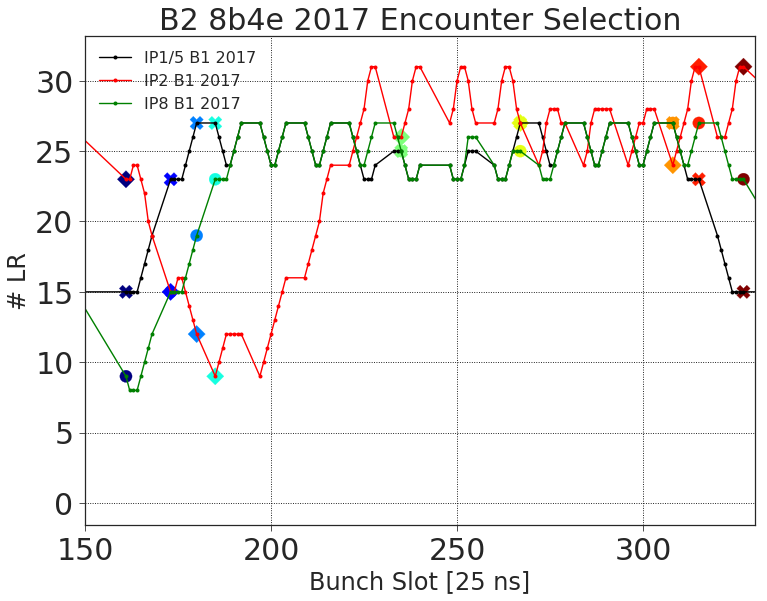

In [249]:
f = plt.figure(figsize=(12,9))
plt.plot(b2_slots_coll_f8b4e2017, b2_coll_IP1_f8b4e2017, 'k.-' , label='IP1/5 B1 2017', markersize=8)
plt.plot(b2_slots_coll_f8b4e2017, b2_coll_IP2_f8b4e2017, 'r.-' , label='IP2 B1 2017', markersize=8)
plt.plot(b2_slots_coll_f8b4e2017, b2_coll_IP8_f8b4e2017, 'g.-' , label='IP8 B1 2017', markersize=8)
plt.grid('on')
# plt.xlim(890, 1060)
# plt.ylim(18, 45)
plt.scatter([161, 173, 180, 185, 235, 267, 308, 315, 327], [15, 23, 27, 27, 25, 27, 27, 23, 15], c=np.arange(9), cmap=plt.cm.jet, s=180, marker='X' )
plt.scatter([161, 173, 180, 185, 235, 267, 308, 315, 327], [23, 15, 12, 9,  26, 27, 24, 31, 31], c=np.arange(9), cmap=plt.cm.jet, s=150, marker='D' )
plt.scatter([161, 173, 180, 185, 235, 267, 308, 315, 327], [9, 15, 19, 23,  25, 25, 27, 27, 23], c=np.arange(9), cmap=plt.cm.jet, s=150, marker='o' )

plt.xlabel("Bunch Slot [25 ns]")
plt.ylabel("# LR")
plt.title("B2 8b4e 2017 Encounter Selection", fontsize=30)
plt.legend()
# plt.xlim(300,300)

plt.xlim(150,330)



#### 3) Collecting Data


## 3.1) 2017 BCMS

In [252]:
with gzip.open('/eos/project/l/lhc-lumimod/LuminosityFollowUp/2017/procdata/fill_{}/fill_{}.pkl.gz'.format(fill_BCMS_2017, fill_BCMS_2017) , 'rb') as fid:
    sb_bcms = pickle.load(fid)
with gzip.open('/eos/project/l/lhc-lumimod/LuminosityFollowUp/2017/procdata/fill_{}/fill_{}.pkl.gz'.format(fill_8b4e_2017, fill_8b4e_2017) , 'rb') as fid:
    sb_8b4e = pickle.load(fid)

In [253]:
print 'BCMS fill length: ', fill_BCMS_2017,  ((sb_bcms['time_range']- sb_bcms['time_range'][0])/3600.0)[-1]
print '8b4e fill length: ', fill_8b4e_2017, ((sb_8b4e['time_range']- sb_8b4e['time_range'][0])/3600.0)[-1]

BCMS fill length:  6050 15.6666666667
8b4e fill length:  6174 12.1666666667


In [268]:
bcms_2017_bunches = np.array([189, 209, 216, 319, 326, 346])

In [269]:
np.where(sb_bcms['slots_filled_coll'][2] == 189)

(array([96]),)

In [270]:
# the index that corresponds to the value above
bcms_2017_indx = [96, 116, 123, 212, 219, 239]

In [271]:
xing_bcms = sb_bcms['xing_angle'][1]*0.5e6

In [272]:
b1_int_bcms = sb_bcms['b_inten_interp_coll'][1][:, bcms_2017_indx]/1.0e11
b2_int_bcms = sb_bcms['b_inten_interp_coll'][2][:, bcms_2017_indx]/1.0e11

In [273]:
b1_eh_bcms = sb_bcms['eh_interp_coll'][1][:, bcms_2017_indx]
b1_ev_bcms = sb_bcms['ev_interp_coll'][1][:, bcms_2017_indx]
b2_eh_bcms = sb_bcms['eh_interp_coll'][2][:, bcms_2017_indx]
b2_ev_bcms = sb_bcms['ev_interp_coll'][2][:, bcms_2017_indx]

In [274]:
b1_blenght_bcms = sb_bcms['bl_interp_m_coll'][1][:, bcms_2017_indx]
b2_blenght_bcms = sb_bcms['bl_interp_m_coll'][2][:, bcms_2017_indx]

In [275]:
b1_lifetime_bcms = sb_bcms['intensity_lifetime'][1][:, bcms_2017_indx]/3600.0
b2_lifetime_bcms = sb_bcms['intensity_lifetime'][2][:, bcms_2017_indx]/3600.0

Get the octupole current:

In [276]:
importData.LHCFillsByNumber(fill_BCMS_2017)

,mode,startTime,endTime,duration
6050,FILL,2017-08-05 09:09:05.033000+00:00,2017-08-06 03:59:07.792000+00:00,18:50:02.759000
6050,SETUP,2017-08-05 10:00:23.479000+00:00,2017-08-05 10:19:03.293000+00:00,00:18:39.814000
6050,INJPROT,2017-08-05 10:19:03.294000+00:00,2017-08-05 10:37:39.108000+00:00,00:18:35.814000
6050,INJPHYS,2017-08-05 10:37:39.109000+00:00,2017-08-05 11:12:54.664000+00:00,00:35:15.555000
6050,PRERAMP,2017-08-05 11:12:54.665000+00:00,2017-08-05 11:18:01.040000+00:00,00:05:06.375000
6050,RAMP,2017-08-05 11:18:01.041000+00:00,2017-08-05 11:38:31.518000+00:00,00:20:30.477000
6050,FLATTOP,2017-08-05 11:38:31.519000+00:00,2017-08-05 11:44:03.738000+00:00,00:05:32.219000
6050,SQUEEZE,2017-08-05 11:44:03.739000+00:00,2017-08-05 11:52:20.570000+00:00,00:08:16.831000
6050,ADJUST,2017-08-05 11:52:20.571000+00:00,2017-08-05 11:59:49.304000+00:00,00:07:28.733000
6050,STABLE,2017-08-05 11:59:49.305000+00:00,2017-08-06 02:34:35.437000+00:00,14:34:46.132000


In [277]:
t1 = pd.Timestamp('2017-08-05 11:59:49.305000+00:00')
t2 = pd.Timestamp('2017-08-06 02:34:35.437000+00:00')

In [278]:
octupoles = importData.cals2pd(['RPMBB.RR17.ROF.A12B2:I_REF'], t1, t2)

In [279]:
# LHCb = importData.cals2pd(['RPTI.SR8.RBLWH.R8:POL_SWITCH_STATE'], t1, t2)
# if len(LHCb) ==1 :
#     if LHCb['RPTI.SR8.RBLWH.R8:POL_SWITCH_STATE'].values == 'POSITIVE':
#         onLHCb = -1
#     elif LHCb['RPTI.SR8.RBLWH.R8:POL_SWITCH_STATE'].values == 'NEGATIVE':
#         onLHCb = 1
# else:
#     print " OH HELL NO"
onLHCb = -1

In [280]:
beamProcess = "PHYSICS-6.5TeV-40cm-120s-2017_V1@120_[END]"
# t1 = sb_bcms['time_range'][0]
# t2 = sb_bcms['time_range'][-1]
# chromaTrims_end = lsa.getTrims(parameter=['LHCBEAM1/QPH','LHCBEAM1/QPV','LHCBEAM2/QPH','LHCBEAM2/QPV'],
#                              beamprocess=beamProcess,
#                              start=t1, end=t2)
# tuneTrims_end = lsa.getTrims(parameter=['LHCBEAM1/QH_TRIM','LHCBEAM1/QV_TRIM','LHCBEAM2/QH_TRIM','LHCBEAM2/QV_TRIM'],
#                              beamprocess=beamProcess,
#                              start=t1, end=t2)
# # tune ref = (.31, 32)
# # B1H = 0.06157
# # B1V = -0.01246
# # B2H = 0.03606
# # B2V = 0.0415

# #chroma ref
# #B1 QPH = 8.5 
# #B1 QPV = 19
# #B2 QPH = 9.5 
# #B2 QPV = 18.6

# QP_offsets = {
# 'LHCBEAM1/QPH': 15.-8.5,
# 'LHCBEAM1/QPV': 15.-19,
# 'LHCBEAM2/QPH': 15.-9.4,
# 'LHCBEAM2/QPV': 15.-18.6,
# }

# Q_offsets = {
# 'LHCBEAM1/QH_TRIM': 62.31-0.06157,
# 'LHCBEAM1/QV_TRIM': 60.32+0.01246,
# 'LHCBEAM2/QH_TRIM': 62.31-0.03606,
# 'LHCBEAM2/QV_TRIM': 60.32-0.0415,
# }

In [281]:
tuneTrims = ['LHCBEAM1/QH_TRIM', 'LHCBEAM1/QV_TRIM', 'LHCBEAM2/QH_TRIM', 'LHCBEAM2/QV_TRIM']
tune_df = importLSA.LHCLsa2pd(tuneTrims, beamProcess, pd.Timestamp("2017-08-05 11:59:49.305000+00:00"), pd.Timestamp("2017-08-06 02:34:35.437000+00:00"))

In [282]:
BCMS = {'time_range'              : sb_bcms['time_range'],
        'xing'                    : xing_bcms,
        'b1_intensity'            : b1_int_bcms,
        'b2_intensity'            : b2_int_bcms,
        'b1_bunchLength'          : b1_blenght_bcms,
        'b2_bunchLength'          : b2_blenght_bcms,
        'b1_emittance_horizontal' : b1_eh_bcms,
        'b1_emittance_vertical'   : b1_ev_bcms,
        'b2_emittance_horizontal' : b2_eh_bcms,
        'b2_emittance_vertical'   : b2_ev_bcms,
        'b1_lifetime'             : b1_lifetime_bcms,
        'b2_lifetime'             : b2_lifetime_bcms,
        'bunches_selected'        : bcms_2017_bunches,
        'index_of_bunch_in_data'  : bcms_2017_indx,
        
        'b1_LR_IP1'               : np.array([20, 40, 40, 40, 40, 20]),
        'b1_LR_IP2'               : np.array([19, 38, 42, 38, 42, 24]),
        'b1_LR_IP8'               : np.array([10, 28, 35, 33, 35, 32]),
               
        'b2_LR_IP1'               : np.array([20, 40, 40, 40, 40, 20]),
        'b2_LR_IP2'               : np.array([13, 32, 39, 35, 39, 30]),
        'b2_LR_IP8'               : np.array([20, 40, 40, 40, 40, 20]),
        
        
        'chromaticity'            : np.array([15.0]*len(sb_bcms['time_range'])),
        'octupoles'               : np.array([338.99]*len(sb_bcms['time_range'])),
        'betastar'                : np.array([0.40]*len(sb_bcms['time_range'])),
        'tune'                    : tune_df,
        'onLHCb'                  : np.array([onLHCb]*len(sb_bcms['time_range']))
}

with gzip.open("BCMS2017_fill_6050_dataForDA.pkl.gz", "wb") as fid:
    pickle.dump(BCMS, fid)
        

In [283]:
!ls | grep BCMS

BCMS2017_fill_6050_dataForDA.pkl.gz
BCMSnoXing_fill_7266_dataForDA.pkl.gz
BCMSvar1_fill_7270_dataForDA.pkl.gz
BCMSvar2_fill_7236_dataForDA.pkl.gz


---

## 3.2) 2017 8b4e
- Beam 1:
  - Bunches : [161, 173, 180, 185, 235, 267, 308, 315, 327]
  - nLR_IP1 : [15, 23, 27, 27, 25, 27, 27, 23, 15]
  - nLR_IP2 : [12, 15, 17, 23, 30, 25, 31, 26, 24]
  - nLR_IP8 : [24, 16, 14, 9,  25, 29, 24, 27, 27]

- Beam 2:
  - Bunches : [161, 173, 180, 185, 235, 267, 308, 315, 327]
  - nLR_IP1 : [15, 23, 27, 27, 25, 27, 27, 23, 15]
  - nLR_IP2 : [23, 15, 12, 9,  26, 27, 24, 31, 31]
  - nLR_IP8 : [9, 15, 19, 23,  25, 25, 27, 27, 23]



In [287]:
b84e_2017_bunches = np.array([161, 173, 180, 185, 235, 267, 308, 315, 327])

In [288]:
for i in b84e_2017_bunches:
    print np.where(sb_8b4e['slots_filled_coll'][1] == i)[0][0], np.where(sb_8b4e['slots_filled_coll'][2] == i)[0][0] 

61 61
69 69
76 76
77 77
111 111
132 132
157 157
164 164
172 172


In [293]:
b84e_2017_indx = np.array([61, 69, 76, 77, 111, 132, 157, 164, 172])

In [306]:
b84e_2017_b1_LR1 = np.array([15, 23, 27, 27, 25, 27, 27, 23, 15])
b84e_2017_b1_LR2 = np.array([12, 15, 17, 23, 30, 25, 31, 26, 24])
b84e_2017_b1_LR8 = np.array([24, 16, 14, 9,  25, 29, 24, 27, 27])

b84e_2017_b2_LR1 = np.array([15, 23, 27, 27, 25, 27, 27, 23, 15])
b84e_2017_b2_LR2 = np.array([23, 15, 12, 9,  26, 27, 24, 31, 31])
b84e_2017_b2_LR8 = np.array([9, 15, 19, 23,  25, 25, 27, 27, 23])

In [295]:
xing_8b4e = sb_8b4e['xing_angle'][1]*0.5e6

In [296]:
b1_int_8b4e = sb_8b4e['b_inten_interp_coll'][1][:, b84e_2017_indx]/1.0e11
b2_int_8b4e = sb_8b4e['b_inten_interp_coll'][2][:, b84e_2017_indx]/1.0e11

In [297]:
b1_eh_8b4e = sb_8b4e['eh_interp_coll'][1][:, b84e_2017_indx]
b1_ev_8b4e = sb_8b4e['ev_interp_coll'][1][:, b84e_2017_indx]
b2_eh_8b4e = sb_8b4e['eh_interp_coll'][2][:, b84e_2017_indx]
b2_ev_8b4e = sb_8b4e['ev_interp_coll'][2][:, b84e_2017_indx]

In [298]:
b1_blenght_8b4e = sb_8b4e['bl_interp_m_coll'][1][:, b84e_2017_indx]
b2_blenght_8b4e = sb_8b4e['bl_interp_m_coll'][2][:, b84e_2017_indx]

In [299]:
b1_lifetime_8b4e = sb_8b4e['intensity_lifetime'][1][:, b84e_2017_indx]/3600.0
b2_lifetime_8b4e = sb_8b4e['intensity_lifetime'][2][:, b84e_2017_indx]/3600.0

In [300]:
importData.LHCFillsByNumber(fill_8b4e_2017)

,mode,startTime,endTime,duration
6174,FILL,2017-09-06 18:27:24.597000+00:00,2017-09-07 09:15:53.240000+00:00,14:48:28.643000
6174,SETUP,2017-09-06 18:34:37.197000+00:00,2017-09-06 19:04:45.891000+00:00,00:30:08.694000
6174,INJPROT,2017-09-06 19:04:45.892000+00:00,2017-09-06 19:34:39.805000+00:00,00:29:53.913000
6174,INJPHYS,2017-09-06 19:34:39.806000+00:00,2017-09-06 20:05:49.862000+00:00,00:31:10.056000
6174,PRERAMP,2017-09-06 20:05:49.863000+00:00,2017-09-06 20:09:01.034000+00:00,00:03:11.171000
6174,RAMP,2017-09-06 20:09:01.035000+00:00,2017-09-06 20:29:15.514000+00:00,00:20:14.479000
6174,FLATTOP,2017-09-06 20:29:15.515000+00:00,2017-09-06 20:33:08.048000+00:00,00:03:52.533000
6174,SQUEEZE,2017-09-06 20:33:08.049000+00:00,2017-09-06 20:41:19.783000+00:00,00:08:11.734000
6174,ADJUST,2017-09-06 20:41:19.784000+00:00,2017-09-06 20:47:46.875000+00:00,00:06:27.091000
6174,STABLE,2017-09-06 20:47:46.876000+00:00,2017-09-07 09:11:12.432000+00:00,12:23:25.556000


In [301]:
t1 = pd.Timestamp('2017-09-12 01:20:51.200000+00:00')
t2 = pd.Timestamp('2017-09-12 13:42:55.323000+00:00')

In [302]:
octupoles = importData.cals2pd(['RPMBB.RR17.ROF.A12B2:I_REF'], t1, t2)
octupoles

,RPMBB.RR17.ROF.A12B2:I_REF
2017-09-12 01:21:12.940000+00:00,338.99
2017-09-12 01:21:14.940000+00:00,338.99
2017-09-12 01:22:12.940000+00:00,338.99
2017-09-12 01:22:14.940000+00:00,338.99
2017-09-12 01:23:12.940000+00:00,338.99
2017-09-12 01:23:14.940000+00:00,338.99
2017-09-12 01:24:12.940000+00:00,338.99
2017-09-12 01:24:14.940000+00:00,338.99
2017-09-12 01:25:12.940000+00:00,338.99
2017-09-12 01:25:14.940000+00:00,338.99


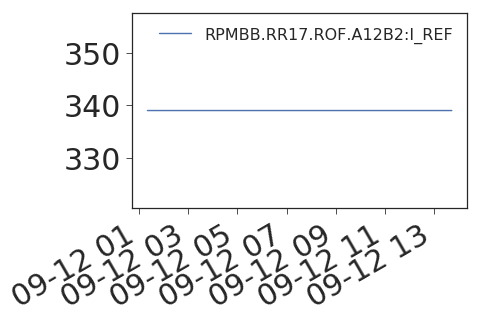

In [303]:
octupoles.plot()

In [304]:
# LHCb = importData.cals2pd(['RPTI.SR8.RBLWH.R8:POL_SWITCH_STATE'], t1, t2)
# if len(LHCb) ==1 :
#     if LHCb['RPTI.SR8.RBLWH.R8:POL_SWITCH_STATE'].values == 'POSITIVE':
#         onLHCb = -1
#     elif LHCb['RPTI.SR8.RBLWH.R8:POL_SWITCH_STATE'].values == 'NEGATIVE':
#         onLHCb = 1
# else:
#     print " OH HELL NO"
onLHCb = 1

In [305]:
chromaTrims = ['LHCBEAM1/QPH', 'LHCBEAM1/QPV', 'LHCBEAM2/QPH', 'LHCBEAM2/QPV']
tuneTrims = ['LHCBEAM1/QH_TRIM', 'LHCBEAM1/QV_TRIM', 'LHCBEAM2/QH_TRIM', 'LHCBEAM2/QV_TRIM']

chroma_df = importLSA.LHCLsa2pd(chromaTrims, beamProcess, t1, t2)
tune_df   = importLSA.LHCLsa2pd(tuneTrims, beamProcess, t1, t2)

In [307]:
b8b4e = {'time_range'              : sb_8b4e['time_range'],
        'xing'                    : xing_8b4e,
        'b1_intensity'            : b1_int_8b4e,
        'b2_intensity'            : b2_int_8b4e,
        'b1_bunchLength'          : b1_blenght_8b4e,
        'b2_bunchLength'          : b2_blenght_8b4e,
        'b1_emittance_horizontal' : b1_eh_8b4e,
        'b1_emittance_vertical'   : b1_ev_8b4e,
        'b2_emittance_horizontal' : b2_eh_8b4e,
        'b2_emittance_vertical'   : b2_ev_8b4e,
        'b1_lifetime'             : b1_lifetime_8b4e,
        'b2_lifetime'             : b2_lifetime_8b4e,
        'bunches_selected'        : b84e_2017_bunches,
        'index_of_bunch_in_data'  : b84e_2017_indx,
        
        'b1_LR_IP1'               : b84e_2017_b1_LR1,
        'b1_LR_IP2'               : b84e_2017_b1_LR2,
        'b1_LR_IP8'               : b84e_2017_b1_LR8,
               
        'b2_LR_IP1'               : b84e_2017_b2_LR1,
        'b2_LR_IP2'               : b84e_2017_b2_LR2,
        'b2_LR_IP8'               : b84e_2017_b2_LR8,
          
        'chromaticity'            : np.array([15.0]*len(sb_8b4e['time_range'])),
        'octupoles'               : np.array([338.99]*len(sb_8b4e['time_range'])),
        'betastar'                : np.array([0.40]*len(sb_8b4e['time_range'])),
        'tune'                    : tune_df,
        'onLHCb' : np.array([onLHCb]*len(sb_8b4e['time_range']))
}

with gzip.open("B8b4e2017_fill_6174_dataForDA.pkl.gz", "wb") as fid:
    pickle.dump(b8b4e, fid)
        

In [308]:
! ls | grep B8b4e

B8b4e2017_fill_6174_dataForDA.pkl.gz
B8b4e2017_fill_6191_dataForDA.pkl.gz


---

## 3.3) 2018 - BCMS Var Xing

- Beam 1:
  - Bunches : [195, 215, 222, 325, 332, 352]
  - nLR_IP1 : [20, 40, 40, 40, 40, 20]
  - nLR_IP2 : [19, 38, 42, 38, 42, 24]
  - nLR_IP8 : [10, 28, 35, 33, 35, 32]

- Beam 2:
  - Bunches : [195, 215, 222, 325, 332, 352]
  - nLR_IP1 : [20, 40, 40, 40, 40, 20]
  - nLR_IP2 : [13, 32, 39, 35, 39, 30]
  - nLR_IP8 : [20, 40, 40, 40, 40, 20]

In [8]:
with gzip.open('/eos/project/l/lhc-lumimod/LuminosityFollowUp/2018/procdata/fill_{}/fill_{}.pkl.gz'.format(fill_BCMS_xing_2018, fill_BCMS_xing_2018) , 'rb') as fid:
    sb_xing = pickle.load(fid)

In [311]:
BCMSxing_2018_bunches = np.array([195, 215, 222, 325, 332, 352])

In [312]:
BCMSxing_2018_b1_LR1 = np.array([20, 40, 40, 40, 40, 20])
BCMSxing_2018_b1_LR2 = np.array([19, 38, 42, 38, 42, 24])
BCMSxing_2018_b1_LR8 = np.array([10, 28, 35, 33, 35, 32])

BCMSxing_2018_b2_LR1 = np.array([20, 40, 40, 40, 40, 20])
BCMSxing_2018_b2_LR2 = np.array([13, 32, 39, 35, 39, 30])
BCMSxing_2018_b2_LR8 = np.array([20, 40, 40, 40, 40, 20])

In [313]:
for i in BCMSxing_2018_bunches:
    print np.where(sb_xing['slots_filled_coll'][1] == i)[0][0], np.where(sb_xing['slots_filled_coll'][2] == i)[0][0] 

96 96
116 116
123 123
212 212
219 219
239 239


In [314]:
BCMSxing_2018_indx = np.array([96, 116, 123, 212, 219, 239])

In [315]:
np.where(sb_xing['slots_filled_coll'][1] == 1057)

(array([767]),)

In [316]:
xing_BCMS_xing = sb_xing['xing_angle'][1]*0.5e6

In [317]:
bstar_BCMS_xing = sb_xing['betastar'][1]/100.0

In [318]:
b1_int_BCMS_xing = sb_xing['b_inten_interp_coll'][1][:, BCMSxing_2018_indx]/1.0e11
b2_int_BCMS_xing = sb_xing['b_inten_interp_coll'][2][:, BCMSxing_2018_indx]/1.0e11

In [319]:
b1_eh_BCMS_xing = sb_xing['eh_interp_coll'][1][:, BCMSxing_2018_indx]
b1_ev_BCMS_xing = sb_xing['ev_interp_coll'][1][:, BCMSxing_2018_indx]
b2_eh_BCMS_xing = sb_xing['eh_interp_coll'][2][:, BCMSxing_2018_indx]
b2_ev_BCMS_xing = sb_xing['ev_interp_coll'][2][:, BCMSxing_2018_indx]

In [320]:
b1_blenght_BCMS_xing = sb_xing['bl_interp_m_coll'][1][:, BCMSxing_2018_indx]
b2_blenght_BCMS_xing = sb_xing['bl_interp_m_coll'][2][:, BCMSxing_2018_indx]

In [321]:
b1_lifetime_BCMS_xing = sb_xing['intensity_lifetime'][1][:, BCMSxing_2018_indx]/3600.0
b2_lifetime_BCMS_xing = sb_xing['intensity_lifetime'][2][:, BCMSxing_2018_indx]/3600.0

In [322]:
importData.LHCFillsByNumber(fill_BCMS_xing_2018)

,mode,startTime,endTime,duration
7270,FILL,2018-10-08 21:33:35.628000+00:00,2018-10-09 14:10:15.955000+00:00,16:36:40.327000
7270,INJPROT,2018-10-08 21:35:47.361000+00:00,2018-10-08 21:46:37.017000+00:00,00:10:49.656000
7270,INJPHYS,2018-10-08 21:46:37.018000+00:00,2018-10-08 22:19:26.439000+00:00,00:32:49.421000
7270,PRERAMP,2018-10-08 22:19:26.440000+00:00,2018-10-08 22:23:09.547000+00:00,00:03:43.107000
7270,RAMP,2018-10-08 22:23:09.548000+00:00,2018-10-08 22:43:24.002000+00:00,00:20:14.454000
7270,FLATTOP,2018-10-08 22:43:24.003000+00:00,2018-10-08 22:48:11.417000+00:00,00:04:47.414000
7270,SQUEEZE,2018-10-08 22:48:11.418000+00:00,2018-10-08 22:59:09.404000+00:00,00:10:57.986000
7270,ADJUST,2018-10-08 22:59:09.405000+00:00,2018-10-08 23:06:58.446000+00:00,00:07:49.041000
7270,STABLE,2018-10-08 23:06:58.447000+00:00,2018-10-09 14:05:27.909000+00:00,14:58:29.462000
7270,BEAMDUMP,2018-10-09 14:05:27.910000+00:00,2018-10-09 14:06:06.181000+00:00,00:00:38.271000


In [323]:
t1 = pd.Timestamp("2018-10-08 23:06:58.447000+00:00")
t2 = pd.Timestamp("2018-10-09 14:05:27.909000+00:00")

In [324]:
octupoles = importData.cals2pd(['RPMBB.RR17.ROF.A12B2:I_REF'], t1, t2)

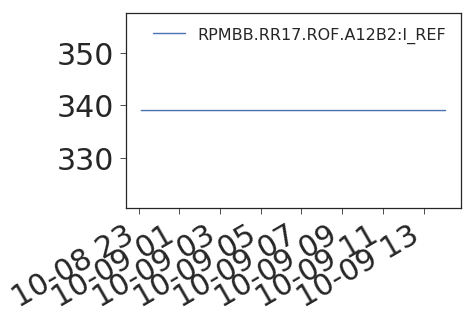

In [325]:
octupoles.plot()

In [326]:
octupoles.iloc[0].values

array([ 338.99])

In [327]:
# LHCb = importData.cals2pd(['RPTI.SR8.RBLWH.R8:POL_SWITCH_STATE'], t1, t2)
# if len(LHCb) ==1 :
#     if LHCb['RPTI.SR8.RBLWH.R8:POL_SWITCH_STATE'].values == 'POSITIVE':
#         onLHCb = -1
#     elif LHCb['RPTI.SR8.RBLWH.R8:POL_SWITCH_STATE'].values == 'NEGATIVE':
#         onLHCb = 1
# else:
#     print " OH HELL NO"
onLHCb = 1

In [328]:
# Offsets
# -------- 
#
# TUNE :
# B1H = 0.05188
# B1V = -0.02002
# B2H = 0.02434
# B2V = 0.04034
#
# Chromaticity
#
# B1H = 7.95981
# B1V = 20.1143
# B2H = 8.51945
# B2V = 18.32254

In [329]:
beamProcess = "PHYSICS-6.5TeV-30cm-120s-2018_V1@120_[END]"

In [330]:
chroma_df = importLSA.LHCLsa2pd(chromaTrims, beamProcess, t1, t2)
tune_df   = importLSA.LHCLsa2pd(tuneTrims, beamProcess, t1, t2)

In [331]:
chroma_df

""


In [332]:
tune_df

,LHCBEAM1/QH_TRIM,LHCBEAM1/QV_TRIM,LHCBEAM2/QH_TRIM,LHCBEAM2/QV_TRIM
2018-10-09 02:02:34+00:00,0.05788,-0.01402,0.02934,0.04734
2018-10-09 02:03:11+00:00,0.05688,-0.01402,0.02934,0.04734
2018-10-09 02:03:24+00:00,0.05588,-0.01402,0.02934,0.04734
2018-10-09 02:03:41+00:00,0.05488,-0.01402,0.02934,0.04734
2018-10-09 02:03:56+00:00,0.05588,-0.01402,0.02934,0.04734
2018-10-09 02:04:32+00:00,0.05688,-0.01402,0.02934,0.04734
2018-10-09 02:04:50+00:00,0.05588,-0.01402,0.02934,0.04734
2018-10-09 02:05:10+00:00,0.05588,-0.01302,0.02934,0.04734
2018-10-09 02:05:49+00:00,0.05588,-0.01402,0.02934,0.04734
2018-10-09 02:05:59+00:00,0.05588,-0.01502,0.02934,0.04734


In [333]:
fill_BCMS_xing_2018

7270

In [334]:
bcms2018_xing1 = {'time_range'              : sb_xing['time_range'],
        'xing'                    : xing_BCMS_xing,
        'b1_intensity'            : b1_int_BCMS_xing,
        'b2_intensity'            : b2_int_BCMS_xing,
        'b1_bunchLength'          : b1_blenght_BCMS_xing,
        'b2_bunchLength'          : b2_blenght_BCMS_xing,
        'b1_emittance_horizontal' : b1_eh_BCMS_xing,
        'b1_emittance_vertical'   : b1_ev_BCMS_xing,
        'b2_emittance_horizontal' : b2_eh_BCMS_xing,
        'b2_emittance_vertical'   : b2_ev_BCMS_xing,
        'b1_lifetime'             : b1_lifetime_BCMS_xing,
        'b2_lifetime'             : b2_lifetime_BCMS_xing,
        'bunches_selected'        : BCMSxing_2018_bunches,
        'index_of_bunch_in_data'  : BCMSxing_2018_indx,

        'b1_LR_IP1'               : BCMSxing_2018_b1_LR1,
        'b1_LR_IP2'               : BCMSxing_2018_b1_LR2,
        'b1_LR_IP8'               : BCMSxing_2018_b1_LR8,
               
        'b2_LR_IP1'               : BCMSxing_2018_b2_LR1,
        'b2_LR_IP2'               : BCMSxing_2018_b2_LR2,
        'b2_LR_IP8'               : BCMSxing_2018_b2_LR8,
                  
                
        'chromaticity'            : np.array([7.0]*len(sb_xing['time_range'])),
        'octupoles'               : np.array([338.99]*len(sb_xing['time_range'])),
        'betastar'                : bstar_BCMS_xing,
        'tune'                    : tune_df,
      'onLHCb' : np.array([onLHCb]*len(sb_xing['time_range']))
}

with gzip.open("BCMSvar1_fill_7270_dataForDA.pkl.gz", "wb") as fid:
    pickle.dump(bcms2018_xing1, fid)
        

---

## 3.3.2) 2018 - BCMS Var Xing v2 

In [335]:
with gzip.open('/eos/project/l/lhc-lumimod/LuminosityFollowUp/2018/procdata/fill_{}/fill_{}.pkl.gz'.format(7236, 7236) , 'rb') as fid:
    sb_xing = pickle.load(fid)

In [336]:
BCMSxing_2018_bunches = np.array([195, 215, 222, 325, 332, 352])
BCMSxing_2018_indx = np.array([96, 116, 123, 212, 219, 239])

In [337]:
BCMSxing_2018_b1_LR1 = np.array([20, 40, 40, 40, 40, 20])
BCMSxing_2018_b1_LR2 = np.array([19, 38, 42, 38, 42, 24])
BCMSxing_2018_b1_LR8 = np.array([10, 28, 35, 33, 35, 32])

BCMSxing_2018_b2_LR1 = np.array([20, 40, 40, 40, 40, 20])
BCMSxing_2018_b2_LR2 = np.array([13, 32, 39, 35, 39, 30])
BCMSxing_2018_b2_LR8 = np.array([20, 40, 40, 40, 40, 20])

In [338]:
xing_BCMS_xing = sb_xing['xing_angle'][1]*0.5e6

In [339]:
bstar_BCMS_xing = sb_xing['betastar'][1]/100.0

In [340]:
b1_int_BCMS_xing = sb_xing['b_inten_interp_coll'][1][:, BCMSxing_2018_indx]/1.0e11
b2_int_BCMS_xing = sb_xing['b_inten_interp_coll'][2][:, BCMSxing_2018_indx]/1.0e11

In [341]:
b1_eh_BCMS_xing = sb_xing['eh_interp_coll'][1][:, BCMSxing_2018_indx]
b1_ev_BCMS_xing = sb_xing['ev_interp_coll'][1][:, BCMSxing_2018_indx]
b2_eh_BCMS_xing = sb_xing['eh_interp_coll'][2][:, BCMSxing_2018_indx]
b2_ev_BCMS_xing = sb_xing['ev_interp_coll'][2][:, BCMSxing_2018_indx]

In [342]:
b1_blenght_BCMS_xing = sb_xing['bl_interp_m_coll'][1][:, BCMSxing_2018_indx]
b2_blenght_BCMS_xing = sb_xing['bl_interp_m_coll'][2][:, BCMSxing_2018_indx]

In [343]:
b1_lifetime_BCMS_xing = sb_xing['intensity_lifetime'][1][:, BCMSxing_2018_indx]/3600.0
b2_lifetime_BCMS_xing = sb_xing['intensity_lifetime'][2][:, BCMSxing_2018_indx]/3600.0

In [344]:
importData.LHCFillsByNumber(7236)

,mode,startTime,endTime,duration
7236,FILL,2018-09-29 16:17:43.944000+00:00,2018-09-30 03:48:19.093000+00:00,11:30:35.149000
7236,SETUP,2018-09-29 16:56:42.100000+00:00,2018-09-29 17:12:31.844000+00:00,00:15:49.744000
7236,INJPROT,2018-09-29 17:12:31.845000+00:00,2018-09-29 17:25:36.190000+00:00,00:13:04.345000
7236,INJPHYS,2018-09-29 17:25:36.191000+00:00,2018-09-29 17:53:04.503000+00:00,00:27:28.312000
7236,PRERAMP,2018-09-29 17:53:04.504000+00:00,2018-09-29 17:55:29.103000+00:00,00:02:24.599000
7236,RAMP,2018-09-29 17:55:29.104000+00:00,2018-09-29 18:15:43.497000+00:00,00:20:14.393000
7236,FLATTOP,2018-09-29 18:15:43.498000+00:00,2018-09-29 18:18:46.986000+00:00,00:03:03.488000
7236,SQUEEZE,2018-09-29 18:18:46.987000+00:00,2018-09-29 18:29:41.818000+00:00,00:10:54.831000
7236,ADJUST,2018-09-29 18:29:41.819000+00:00,2018-09-29 18:37:41.346000+00:00,00:07:59.527000
7236,STABLE,2018-09-29 18:37:41.347000+00:00,2018-09-30 03:43:54.607000+00:00,09:06:13.260000


In [345]:
t1 = pd.Timestamp("2018-09-29 18:37:41.347000+00:00")
t2 = pd.Timestamp("2018-09-30 03:43:54.607000+00:00")

In [346]:
octupoles = importData.cals2pd(['RPMBB.RR17.ROF.A12B2:I_REF'], t1, t2)

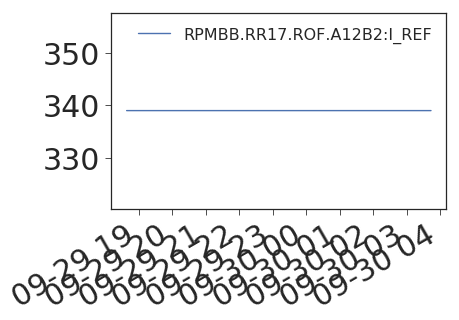

In [347]:
octupoles.plot()

In [348]:
octupoles.iloc[0].values

array([ 338.99])

In [349]:
# LHCb = importData.cals2pd(['RPTI.SR8.RBLWH.R8:POL_SWITCH_STATE'], pd.Timestamp("2018-09-29 16:17:43.944000+00:00"), t2)
# if len(LHCb) ==1 :
#     if LHCb['RPTI.SR8.RBLWH.R8:POL_SWITCH_STATE'].values == 'POSITIVE':
#         onLHCb = -1
#     elif LHCb['RPTI.SR8.RBLWH.R8:POL_SWITCH_STATE'].values == 'NEGATIVE':
#         onLHCb = 1
# else:
#     print " OH HELL NO"
onLHCb = -1

In [350]:
# Offsets
# -------- 
#
# TUNE :
# B1H = 0.05188
# B1V = -0.02002
# B2H = 0.02434
# B2V = 0.04034
#
# Chromaticity
#
# B1H = 7.95981
# B1V = 20.1143
# B2H = 8.51945
# B2V = 18.32254

In [351]:
beamProcess = "PHYSICS-6.5TeV-30cm-120s-2018_V1@120_[END]"

In [352]:
chroma_df = importLSA.LHCLsa2pd(chromaTrims, beamProcess, t1, t2)
tune_df   = importLSA.LHCLsa2pd(tuneTrims, beamProcess, t1, t2)

In [353]:
chroma_df

""


In [354]:
tune_df

,LHCBEAM1/QH_TRIM,LHCBEAM1/QV_TRIM,LHCBEAM2/QH_TRIM,LHCBEAM2/QV_TRIM
2018-09-29 19:05:00+00:00,0.05788,NaN,NaN,NaN
2018-09-29 19:05:20+00:00,0.05688,NaN,NaN,NaN
2018-09-29 19:05:34+00:00,0.05588,NaN,NaN,NaN
2018-09-29 19:06:01+00:00,0.05688,NaN,NaN,NaN
2018-09-29 19:06:18+00:00,NaN,-0.01502,NaN,NaN
2018-09-29 19:06:37+00:00,NaN,-0.01402,NaN,NaN
2018-09-29 19:06:51+00:00,NaN,-0.01302,NaN,NaN
2018-09-29 19:07:25+00:00,NaN,NaN,0.03034,NaN
2018-09-29 19:07:40+00:00,NaN,NaN,0.02934,NaN
2018-09-29 19:07:57+00:00,NaN,NaN,0.02834,NaN


In [355]:
bcms2018_xing2 = {'time_range'              : sb_xing['time_range'],
        'xing'                    : xing_BCMS_xing,
        'b1_intensity'            : b1_int_BCMS_xing,
        'b2_intensity'            : b2_int_BCMS_xing,
        'b1_bunchLength'          : b1_blenght_BCMS_xing,
        'b2_bunchLength'          : b2_blenght_BCMS_xing,
        'b1_emittance_horizontal' : b1_eh_BCMS_xing,
        'b1_emittance_vertical'   : b1_ev_BCMS_xing,
        'b2_emittance_horizontal' : b2_eh_BCMS_xing,
        'b2_emittance_vertical'   : b2_ev_BCMS_xing,
        'b1_lifetime'             : b1_lifetime_BCMS_xing,
        'b2_lifetime'             : b2_lifetime_BCMS_xing,
        'bunches_selected'        : BCMSxing_2018_bunches,
        'index_of_bunch_in_data'  : BCMSxing_2018_indx,
      
        'b1_LR_IP1'               : BCMSxing_2018_b1_LR1,
        'b1_LR_IP2'               : BCMSxing_2018_b1_LR2,
        'b1_LR_IP8'               : BCMSxing_2018_b1_LR8,
               
        'b2_LR_IP1'               : BCMSxing_2018_b2_LR1,
        'b2_LR_IP2'               : BCMSxing_2018_b2_LR2,
        'b2_LR_IP8'               : BCMSxing_2018_b2_LR8,
                  
        'chromaticity'            : np.array([7.0]*len(sb_xing['time_range'])),
        'octupoles'               : np.array([338.99]*len(sb_xing['time_range'])),
        'betastar'                : bstar_BCMS_xing,
        'tune'                    : tune_df,
      'onLHCb' : np.array([onLHCb]*len(sb_xing['time_range']))
}

with gzip.open("BCMSvar2_fill_7236_dataForDA.pkl.gz", "wb") as fid:
    pickle.dump(bcms2018_xing2, fid)
        

---

## 3.4) 2018 - BCMS Const Xing

In [357]:
with gzip.open('/eos/project/l/lhc-lumimod/LuminosityFollowUp/2018/procdata/fill_{}/fill_{}.pkl.gz'.format(fill_BCMS_noxing_2018, fill_BCMS_noxing_2018) , 'rb') as fid:
    sb_noxing = pickle.load(fid)

In [358]:
BCMSxing_2018_bunches = np.array([195, 215, 222, 325, 332, 352])
BCMSxing_2018_indx = np.array([96, 116, 123, 212, 219, 239])

In [359]:
BCMSxing_2018_b1_LR1 = np.array([20, 40, 40, 40, 40, 20])
BCMSxing_2018_b1_LR2 = np.array([19, 38, 42, 38, 42, 24])
BCMSxing_2018_b1_LR8 = np.array([10, 28, 35, 33, 35, 32])

BCMSxing_2018_b2_LR1 = np.array([20, 40, 40, 40, 40, 20])
BCMSxing_2018_b2_LR2 = np.array([13, 32, 39, 35, 39, 30])
BCMSxing_2018_b2_LR8 = np.array([20, 40, 40, 40, 40, 20])

In [104]:
np.where(sb_noxing['slots_filled_coll'][1] == 1057)

(array([767]),)

In [360]:
xing_BCMS_noxing = sb_noxing['xing_angle'][1]*0.5e6

In [361]:
bstar_BCMS_noxing = sb_noxing['betastar'][1]/100.0

In [362]:
b1_int_BCMS_noxing = sb_noxing['b_inten_interp_coll'][1][:, BCMSxing_2018_indx]/1.0e11
b2_int_BCMS_noxing = sb_noxing['b_inten_interp_coll'][2][:, BCMSxing_2018_indx]/1.0e11

In [363]:
b1_eh_BCMS_noxing = sb_noxing['eh_interp_coll'][1][:, BCMSxing_2018_indx]
b1_ev_BCMS_noxing = sb_noxing['ev_interp_coll'][1][:, BCMSxing_2018_indx]
b2_eh_BCMS_noxing = sb_noxing['eh_interp_coll'][2][:, BCMSxing_2018_indx]
b2_ev_BCMS_noxing = sb_noxing['ev_interp_coll'][2][:, BCMSxing_2018_indx]

In [364]:
b1_blenght_BCMS_noxing = sb_noxing['bl_interp_m_coll'][1][:, BCMSxing_2018_indx]
b2_blenght_BCMS_noxing = sb_noxing['bl_interp_m_coll'][2][:, BCMSxing_2018_indx]

In [365]:
b1_lifetime_BCMS_noxing = sb_noxing['intensity_lifetime'][1][:, BCMSxing_2018_indx]/3600.0
b2_lifetime_BCMS_noxing = sb_noxing['intensity_lifetime'][2][:, BCMSxing_2018_indx]/3600.0

In [366]:
importData.LHCFillsByNumber(fill_BCMS_noxing_2018)

,mode,startTime,endTime,duration
7266,FILL,2018-10-07 22:55:50.281000+00:00,2018-10-08 12:24:58.552000+00:00,13:29:08.271000
7266,SETUP,2018-10-07 23:36:05.407000+00:00,2018-10-07 23:58:29.226000+00:00,00:22:23.819000
7266,INJPROT,2018-10-07 23:58:29.227000+00:00,2018-10-08 00:07:29.359000+00:00,00:09:00.132000
7266,INJPHYS,2018-10-08 00:07:29.360000+00:00,2018-10-08 00:41:21.744000+00:00,00:33:52.384000
7266,PRERAMP,2018-10-08 00:41:21.745000+00:00,2018-10-08 00:49:47.380000+00:00,00:08:25.635000
7266,RAMP,2018-10-08 00:49:47.381000+00:00,2018-10-08 01:10:12.359000+00:00,00:20:24.978000
7266,FLATTOP,2018-10-08 01:10:12.360000+00:00,2018-10-08 01:13:01.917000+00:00,00:02:49.557000
7266,SQUEEZE,2018-10-08 01:13:01.918000+00:00,2018-10-08 01:23:56.749000+00:00,00:10:54.831000
7266,ADJUST,2018-10-08 01:23:56.750000+00:00,2018-10-08 01:30:01.883000+00:00,00:06:05.133000
7266,STABLE,2018-10-08 01:30:01.884000+00:00,2018-10-08 12:18:34.808000+00:00,10:48:32.924000


In [367]:
t1 = pd.Timestamp("2018-10-08 01:13:01.918000+00:000")
t2 = pd.Timestamp("2018-10-08 12:18:34.808000+00:000")

In [368]:
octupoles = importData.cals2pd(['RPMBB.RR17.ROF.A12B2:I_REF'], t1, t2)

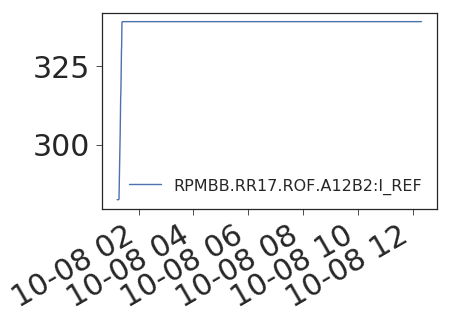

In [369]:
octupoles.plot()

In [370]:
octupoles.iloc[0].values

array([ 282.49])

In [371]:
# LHCb = importData.cals2pd(['RPTI.SR8.RBLWH.R8:POL_SWITCH_STATE'], t1, t2)
# if len(LHCb) ==1 :
#     if LHCb['RPTI.SR8.RBLWH.R8:POL_SWITCH_STATE'].values == 'POSITIVE':
#         onLHCb = -1
#     elif LHCb['RPTI.SR8.RBLWH.R8:POL_SWITCH_STATE'].values == 'NEGATIVE':
#         onLHCb = 1
# else:
#     print " OH HELL NO"
onLHCb=1

In [372]:
# Offsets
# -------- 
#
# TUNE :
# B1H = 0.05188
# B1V = -0.02002
# B2H = 0.02434
# B2V = 0.04034
#
# Chromaticity
#
# B1H = 7.95981
# B1V = 20.1143
# B2H = 8.51945
# B2V = 18.32254

In [373]:
beamProcess = "PHYSICS-6.5TeV-30cm-120s-2018_V1@120_[END]"

In [374]:
chroma_df = importLSA.LHCLsa2pd(chromaTrims, beamProcess, t1, t2)
tune_df   = importLSA.LHCLsa2pd(tuneTrims, beamProcess, t1, t2)

In [375]:
chroma_df

,LHCBEAM1/QPH,LHCBEAM1/QPV,LHCBEAM2/QPH,LHCBEAM2/QPV
2018-10-08 01:24:35+00:00,-0.04019,12.1143,0.51945,10.32254
2018-10-08 01:24:57+00:00,-0.04019,12.1143,0.51945,10.32254


In [376]:
bcms2018_noxing = {'time_range'              : sb_noxing['time_range'],
        'xing'                    : xing_BCMS_noxing,
        'b1_intensity'            : b1_int_BCMS_noxing,
        'b2_intensity'            : b2_int_BCMS_noxing,
        'b1_bunchLength'          : b1_blenght_BCMS_noxing,
        'b2_bunchLength'          : b2_blenght_BCMS_noxing,
        'b1_emittance_horizontal' : b1_eh_BCMS_noxing,
        'b1_emittance_vertical'   : b1_ev_BCMS_noxing,
        'b2_emittance_horizontal' : b2_eh_BCMS_noxing,
        'b2_emittance_vertical'   : b2_ev_BCMS_noxing,
        'b1_lifetime'             : b1_lifetime_BCMS_noxing,
        'b2_lifetime'             : b2_lifetime_BCMS_noxing,
        'bunches_selected'        : BCMSxing_2018_bunches,
        'index_of_bunch_in_data'  : BCMSxing_2018_indx,

        'b1_LR_IP1'               : BCMSxing_2018_b1_LR1,
        'b1_LR_IP2'               : BCMSxing_2018_b1_LR2,
        'b1_LR_IP8'               : BCMSxing_2018_b1_LR8,
               
        'b2_LR_IP1'               : BCMSxing_2018_b2_LR1,
        'b2_LR_IP2'               : BCMSxing_2018_b2_LR2,
        'b2_LR_IP8'               : BCMSxing_2018_b2_LR8,
                  
        'chromaticity'            : np.array([7.0]*len(sb_noxing['time_range'])),
        'octupoles'               : np.array([338.99]*len(sb_noxing['time_range'])),
        'betastar'                : bstar_BCMS_xing,
        'tune'                    : tune_df,
       'onLHCb' : np.array([onLHCb]*len(sb_noxing['time_range']))
}

with gzip.open("BCMSnoXing_fill_7266_dataForDA.pkl.gz", "wb") as fid:
    pickle.dump(bcms2018_noxing, fid)
        

# 4. Calculate the per 10min data

## 4.1 BCMS 2018 var xing 1

In [431]:
filln = 7270

In [432]:
with gzip.open("BCMSvar1_fill_{}_dataForDA.pkl.gz".format(filln), 'rb') as fid:
    dd = pickle.load(fid)
dd.keys()

['time_range',
 'b1_bunchLength',
 'b1_LR_IP8',
 'b1_lifetime',
 'onLHCb',
 'b1_LR_IP1',
 'b1_LR_IP2',
 'b2_LR_IP1',
 'b2_LR_IP2',
 'b2_LR_IP8',
 'chromaticity',
 'b1_emittance_horizontal',
 'b2_emittance_horizontal',
 'octupoles',
 'b1_emittance_vertical',
 'betastar',
 'b2_bunchLength',
 'b2_emittance_vertical',
 'xing',
 'b2_lifetime',
 'tune',
 'b2_intensity',
 'b1_intensity',
 'bunches_selected',
 'index_of_bunch_in_data']

### Let's fix the general DF and then we generate a DF per bunch

Create a total fill DF for book-keeping

In [433]:
totdf = pd.DataFrame()
totdf['index']        = np.arange(len(dd['time_range'][::2]))
totdf['timestamp']    = dd['time_range'][::2] # every 10 min
totdf                 = totdf.set_index('timestamp')
totdf['xing']         = dd['xing'][::2]
totdf['betastar']     = dd['betastar'][::2]
totdf['chromaticity'] = dd['chromaticity'][::2]
totdf['octupole']     = dd['octupoles'][::2]
totdf['onLHCb']       = dd['onLHCb'][::2]

Get the tune df and merge it with the main DF

In [434]:
tunedf = dd['tune']
tunedf['timestamp'] = tunedf.index.to_datetime().values.astype('int64')/1e9
tunedf['LHCBEAM1/QH_TRIM'] = tunedf['LHCBEAM1/QH_TRIM'] + 62.305 - 0.05188
tunedf['LHCBEAM1/QV_TRIM'] = tunedf['LHCBEAM1/QV_TRIM'] + 60.315 + 0.02002
tunedf['LHCBEAM2/QH_TRIM'] = tunedf['LHCBEAM2/QH_TRIM'] + 62.305 - 0.02434
tunedf['LHCBEAM2/QV_TRIM'] = tunedf['LHCBEAM2/QV_TRIM'] + 60.315 - 0.04034
tunedf = tunedf.set_index('timestamp')

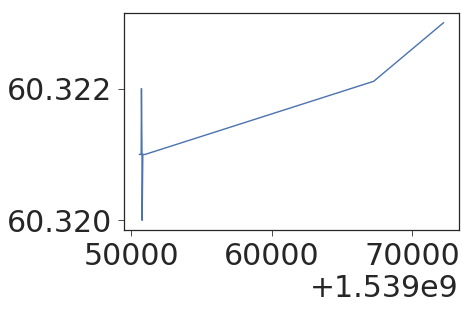

In [435]:
plt.plot(tunedf['LHCBEAM1/QV_TRIM'])

In [436]:
totdf = pd.merge_asof(totdf, tunedf, left_index=True, right_index=True)

In [437]:
totdf['LHCBEAM1/QH_TRIM'] = totdf['LHCBEAM1/QH_TRIM'].fillna(62.305)
totdf['LHCBEAM1/QV_TRIM'] = totdf['LHCBEAM1/QV_TRIM'].fillna(60.315)
totdf['LHCBEAM2/QH_TRIM'] = totdf['LHCBEAM2/QH_TRIM'].fillna(62.305)
totdf['LHCBEAM2/QV_TRIM'] = totdf['LHCBEAM2/QV_TRIM'].fillna(60.315)

In [438]:
totdf = totdf.rename(columns={'LHCBEAM1/QH_TRIM': 'B1H_TUNE', 'LHCBEAM1/QV_TRIM': 'B1V_TUNE', 'LHCBEAM2/QH_TRIM': 'B2H_TUNE', "LHCBEAM2/QV_TRIM":"B2V_TUNE"})

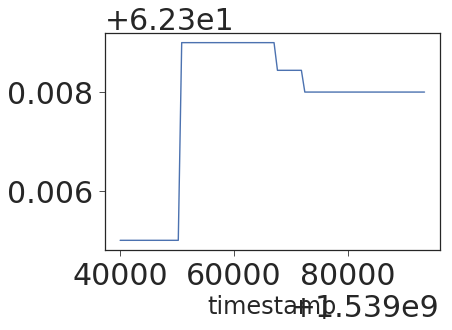

In [439]:
totdf['B1H_TUNE'].plot()

Now run per bunch

In [440]:
bunches      = dd['bunches_selected']
b1_nLR_1     = dd['b1_LR_IP1']
b1_nLR_2     = dd['b1_LR_IP2']
b1_nLR_8     = dd['b1_LR_IP8']
b2_nLR_1     = dd['b2_LR_IP1']
b2_nLR_2     = dd['b2_LR_IP2']
b2_nLR_8     = dd['b2_LR_IP8']

In [441]:
b1_nLR_1

array([20, 40, 40, 40, 40, 20])

In [442]:
for idx, bn in enumerate(bunches):
    temp_tot = totdf.copy()
    temp_tot['bunch'] = [bn]*len(temp_tot)
    temp_tot['fill']  = [filln]*len(temp_tot)
    temp_tot['b1_intensity'] = dd['b1_intensity'][:,idx][::2]
    temp_tot['b2_intensity'] = dd['b2_intensity'][:,idx][::2]
    temp_tot['b1_emittance_conv'] = (dd['b1_emittance_horizontal'][:,idx][::2] + dd['b1_emittance_vertical'][:,idx][::2])/2.0
    temp_tot['b2_emittance_conv'] = (dd['b2_emittance_horizontal'][:,idx][::2] + dd['b2_emittance_vertical'][:,idx][::2])/2.0
    temp_tot['b1_lifetime'] = dd['b1_lifetime'][:,idx][::2]
    temp_tot['b2_lifetime'] = dd['b2_lifetime'][:,idx][::2]
    temp_tot['b1_bunchLength'] = dd['b1_bunchLength'][:,idx][::2]
    temp_tot['b2_bunchLength'] = dd['b2_bunchLength'][:,idx][::2]
    
    temp_tot['b1_nLR_IP1'] = [b1_nLR_1[idx]]*len(temp_tot)
    temp_tot['b1_nLR_IP2'] = [b1_nLR_2[idx]]*len(temp_tot)
    temp_tot['b1_nLR_IP8'] = [b1_nLR_8[idx]]*len(temp_tot)

    temp_tot['b2_nLR_IP1'] = [b2_nLR_1[idx]]*len(temp_tot)
    temp_tot['b2_nLR_IP2'] = [b2_nLR_2[idx]]*len(temp_tot)
    temp_tot['b2_nLR_IP8'] = [b2_nLR_8[idx]]*len(temp_tot)
    fileout = "fill_{}_bunch_{}.csv".format(filln, bn)
    print 'writing file {}'.format(fileout)
    temp_tot.to_csv(fileout, sep=',', header=True)

writing file fill_7270_bunch_195.csv
writing file fill_7270_bunch_215.csv
writing file fill_7270_bunch_222.csv
writing file fill_7270_bunch_325.csv
writing file fill_7270_bunch_332.csv
writing file fill_7270_bunch_352.csv


In [443]:
! pwd

/eos/home-n/nkarast/LHC/code


In [405]:
ndf = pd.read_csv("fill_7270_bunch_195.csv", sep=',')

In [406]:
ndf

,timestamp,index,xing,betastar,chromaticity,octupole,onLHCb,B1H_TUNE,B1V_TUNE,B2H_TUNE,...,b1_lifetime,b2_lifetime,b1_bunchLength,b2_bunchLength,b1_nLR_IP1,b1_nLR_IP2,b1_nLR_IP8,b2_nLR_IP1,b2_nLR_IP2,b2_nLR_IP8
0,1.539040e+09,0,160.000000,0.30,7.0,338.99,1,62.305,60.315,62.305,...,24.151230,20.847032,0.081580,0.079682,20,19,10,20,13,20
1,1.539041e+09,1,160.000000,0.30,7.0,338.99,1,62.305,60.315,62.305,...,28.303586,24.236220,0.083157,0.079314,20,19,10,20,13,20
2,1.539041e+09,2,160.000000,0.30,7.0,338.99,1,62.305,60.315,62.305,...,31.240910,26.631908,0.082026,0.079061,20,19,10,20,13,20
3,1.539042e+09,3,160.000000,0.30,7.0,338.99,1,62.305,60.315,62.305,...,24.892802,22.807337,0.082264,0.078238,20,19,10,20,13,20
4,1.539042e+09,4,160.000000,0.30,7.0,338.99,1,62.305,60.315,62.305,...,27.580362,23.364653,0.081276,0.079106,20,19,10,20,13,20
5,1.539043e+09,5,154.616667,0.30,7.0,338.99,1,62.305,60.315,62.305,...,25.698147,24.078428,0.082491,0.078756,20,19,10,20,13,20
6,1.539044e+09,6,153.000000,0.30,7.0,338.99,1,62.305,60.315,62.305,...,26.330511,24.013094,0.082034,0.079280,20,19,10,20,13,20
7,1.539044e+09,7,152.616667,0.30,7.0,338.99,1,62.305,60.315,62.305,...,26.293406,25.623211,0.079679,0.078511,20,19,10,20,13,20
8,1.539045e+09,8,152.000000,0.30,7.0,338.99,1,62.305,60.315,62.305,...,26.938386,24.538774,0.080942,0.078108,20,19,10,20,13,20
9,1.539045e+09,9,151.000000,0.30,7.0,338.99,1,62.305,60.315,62.305,...,25.399495,26.252967,0.082043,0.077580,20,19,10,20,13,20


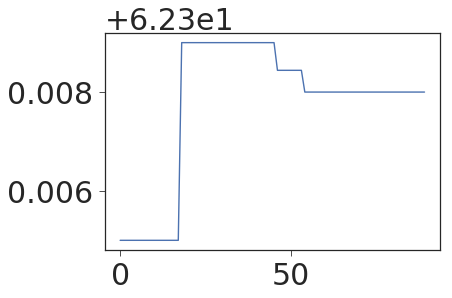

In [407]:
ndf['B1H_TUNE'].plot()

---

#### Verify the transfered data!

In [410]:
!tail fill_7270_bunch_195.csv

1539088018.0,80,130.0,0.25,7.0,338.99,1,62.308,60.323,62.316,60.326,195,7270,0.675913048333,0.708787551667,2.16979995543,2.245296055,33.388314974,36.0527062216,0.0660814479752,0.0660647461022,20,19,10,20,13,20
1539088618.0,81,130.0,0.25,7.0,338.99,1,62.308,60.323,62.316,60.326,195,7270,0.672599101667,0.705371571667,2.17665661322,2.25302528866,34.4085165882,35.5465884516,0.0672952084643,0.0655735440414,20,19,10,20,13,20
1539089218.0,82,130.0,0.25,7.0,338.99,1,62.308,60.323,62.316,60.326,195,7270,0.669304016667,0.702116511667,2.18258792413,2.26131080293,34.9724066424,33.2145869996,0.0657605545767,0.0655487387299,20,19,10,20,13,20
1539089818.0,83,130.0,0.25,7.0,338.99,1,62.308,60.323,62.316,60.326,195,7270,0.666106055,0.698656096667,2.18828713883,2.26963423272,33.6030255564,34.9261688612,0.0643274166811,0.0653910964923,20,19,10,20,13,20
1539090418.0,84,130.0,0.25,7.0,338.99,1,62.308,60.323,62.316,60.326,195,7270,0.662927466667,0.695338953333,2.19379858139,2.27811801812,34.8568696403,36.10

In [413]:
ndf = pd.read_csv("fill_7270_bunch_195.csv", sep=',')

In [414]:
ndf['B1H_TUNE']

0     62.305
1     62.305
2     62.305
3     62.305
4     62.305
5     62.305
6     62.305
7     62.305
8     62.305
9     62.305
10    62.305
11    62.305
12    62.305
13    62.305
14    62.305
15    62.305
16    62.305
17    62.305
18    62.309
19    62.309
20    62.309
21    62.309
22    62.309
23    62.309
24    62.309
25    62.309
26    62.309
27    62.309
28    62.309
29    62.309
       ...  
60    62.308
61    62.308
62    62.308
63    62.308
64    62.308
65    62.308
66    62.308
67    62.308
68    62.308
69    62.308
70    62.308
71    62.308
72    62.308
73    62.308
74    62.308
75    62.308
76    62.308
77    62.308
78    62.308
79    62.308
80    62.308
81    62.308
82    62.308
83    62.308
84    62.308
85    62.308
86    62.308
87    62.308
88    62.308
89    62.308
Name: B1H_TUNE, Length: 90, dtype: float64

In [415]:
with gzip.open("/eos/project/l/lhc-lumimod/LuminosityFollowUp/2018/procdata/fill_7270/fill_7270.pkl.gz", 'rb') as fid:
    aa=pickle.load(fid)

In [416]:
np.where(aa['slots_filled_coll'][1]==195)[0][0]

96

Text(0,0.5,u'intensity b1')

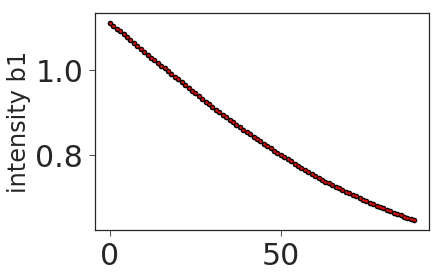

In [417]:
plt.plot(np.array(aa['b_inten_interp_coll'][1])[:,96][::2]/1.0e11, 'ko')
plt.plot(ndf['b1_intensity'].values, 'r.')
plt.ylabel('intensity b1')

Text(0,0.5,u'intensity b2')

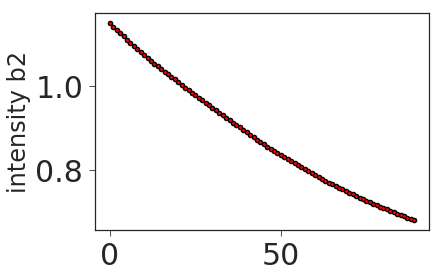

In [418]:
plt.plot(np.array(aa['b_inten_interp_coll'][2])[:,96][::2]/1.0e11, 'ko')
plt.plot(ndf['b2_intensity'].values, 'r.')
plt.ylabel('intensity b2')

Text(0,0.5,u'emittance b1')

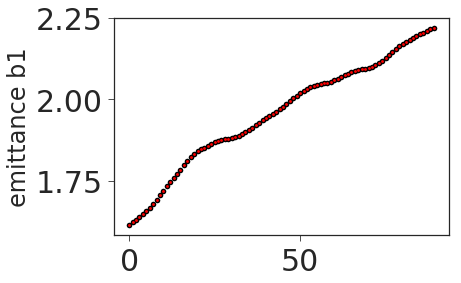

In [419]:
plt.plot((np.array(aa['eh_interp_coll'][1])[:,96][::2]+np.array(aa['ev_interp_coll'][1])[:,96][::2])/2.0, 'ko')
plt.plot(ndf['b1_emittance_conv'].values, 'r.')
plt.ylabel('emittance b1')

Text(0,0.5,u'emittance b2')

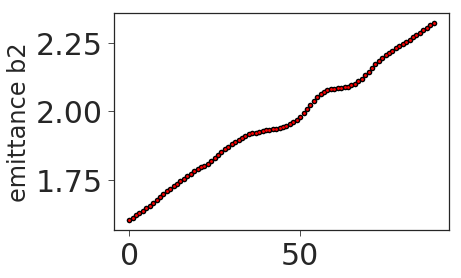

In [420]:
plt.plot((np.array(aa['eh_interp_coll'][2])[:,96][::2]+np.array(aa['ev_interp_coll'][2])[:,96][::2])/2.0, 'ko')
plt.plot(ndf['b2_emittance_conv'].values, 'r.')
plt.ylabel('emittance b2')

Text(0,0.5,u'lifetime b1')

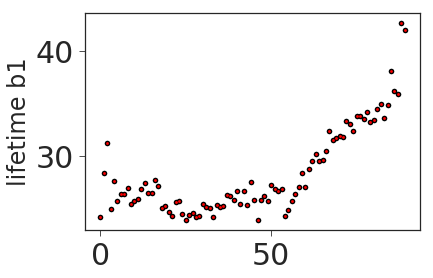

In [421]:
plt.plot(np.array(aa['intensity_lifetime'][1])[:,96][::2]/3600., 'ko')
plt.plot(ndf['b1_lifetime'].values, 'r.')
plt.ylabel('lifetime b1')

Text(0,0.5,u'lifetime b2')

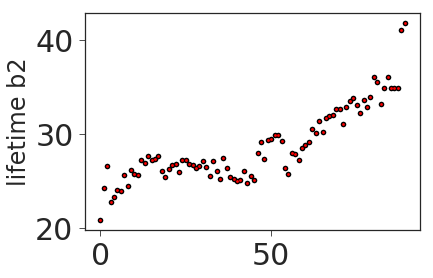

In [422]:
plt.plot(np.array(aa['intensity_lifetime'][2])[:,96][::2]/3600., 'ko')
plt.plot(ndf['b2_lifetime'].values, 'r.')
plt.ylabel('lifetime b2')

Text(0,0.5,u'blength b1')

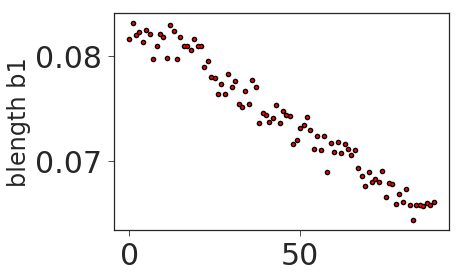

In [423]:
plt.plot(np.array(aa['bl_interp_m_coll'][1])[:,96][::2], 'ko')
plt.plot(ndf['b1_bunchLength'].values, 'r.')
plt.ylabel('blength b1')

Text(0,0.5,u'blength b2')

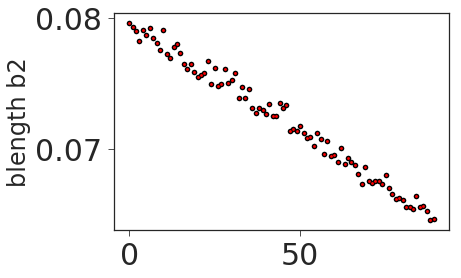

In [424]:
plt.plot(np.array(aa['bl_interp_m_coll'][2])[:,96][::2], 'ko')
plt.plot(ndf['b2_bunchLength'].values, 'r.')
plt.ylabel('blength b2')

I think we're ok!

---

In [429]:
ndf = pd.read_csv("fill_7270_bunch_195.csv", sep=',')

In [430]:
ndf[ndf['index']==19].transpose()

,19
timestamp,1.539051e+09
index,1.900000e+01
xing,1.450000e+02
betastar,3.000000e-01
chromaticity,7.000000e+00
octupole,3.389900e+02
onLHCb,1.000000e+00
B1H_TUNE,6.230900e+01
B1V_TUNE,6.032100e+01
B2H_TUNE,6.231700e+01


---

For only one

In [9]:
with gzip.open('/eos/project/l/lhc-lumimod/LuminosityFollowUp/2018/procdata/fill_{}/fill_{}.pkl.gz'.format(fill_BCMS_xing_2018, fill_BCMS_xing_2018) , 'rb') as fid:
    dd = pickle.load(fid)

In [10]:
t = dd['time_range']

In [11]:
bstar = dd['betastar'][1]/100.

In [12]:
xing    = dd['xing_angle'][1]/2.0e-6
nb1     = np.nanmean(dd['b_inten_interp_coll'][1], axis=1)
nb2     = np.nanmean(dd['b_inten_interp_coll'][2], axis=1)
nb1_bb  = dd['b_inten_interp_coll'][1]
nb2_bb  = dd['b_inten_interp_coll'][2]
nb_mean = (nb1+nb2)/2.0
eh1     = np.nanmean(dd['eh_interp_coll'][1], axis=1)
ev1     = np.nanmean(dd['ev_interp_coll'][1], axis=1)
eh2     = np.nanmean(dd['eh_interp_coll'][2], axis=1)
ev2     = np.nanmean(dd['ev_interp_coll'][2], axis=1)
en_b1   = (eh1+ev1)/2.0
en_b2   = (eh2+ev2)/2.0
en_tot  = (en_b1+en_b2)/2.0
bl1     = np.nanmean(dd['bl_interp_m_coll'][1], axis=1)
bl2     = np.nanmean(dd['bl_interp_m_coll'][2], axis=1)
bl_mean = (bl1+bl2)/2.0

slots_b1     = dd['slots_filled_coll'][1]
t_mat_b1     = np.dot(np.ones((len(slots_b1), 1)), np.atleast_2d(t)).T
loss_rate_b1 = -np.diff(nb1_bb, axis=0)/np.diff(t_mat_b1, axis=0)

slots_b2     = dd['slots_filled_coll'][2]
t_mat_b2     = np.dot(np.ones((len(slots_b2), 1)), np.atleast_2d(t)).T
loss_rate_b2 = -np.diff(nb2_bb, axis=0)/np.diff(t_mat_b2, axis=0)

with gzip.open('/eos/project/l/lhc-lumimod/LuminosityFollowUp/2018/procdata/fill_{}/fill_{}_lumi_meas.pkl.gz'.format(fill_BCMS_xing_2018, fill_BCMS_xing_2018) , 'rb') as fid:
    lumi_data = pickle.load(fid)
tot_lumi      = (lumi_data['ATLAS']['bunch_lumi']+lumi_data['CMS']['bunch_lumi'])[:-1, :]
sigma_m2      = 80e-3*1e-28
BO_loss_rate  = tot_lumi*sigma_m2

# Remove from the FBCT loss rate the calculated BO loss rate
loss_rate_woBO_b1 = loss_rate_b1-BO_loss_rate
loss_rate_woBO_b2 = loss_rate_b2-BO_loss_rate
lifet_woBO_h_B1   = 1/(loss_rate_woBO_b1/nb1_bb[:-1,:])/3600.
lifet_woBO_h_B2   = 1/(loss_rate_woBO_b2/nb2_bb[:-1,:])/3600.
m_lf_woBO_h_b1    = np.nanmean(lifet_woBO_h_B1, axis=1)
m_lf_woBO_h_b2    = np.nanmean(lifet_woBO_h_B2, axis=1)

In [37]:
df = pd.DataFrame()
df['time']            = t[::2]
df['index']           = np.arange(len(t[::2]))
df['xing']            = xing[::2]
df['betastar']        = bstar[::2]
df['onlhcb']          = [1]*len(df)
df['intensity']       = nb_mean[::2]/1.0e11
df['intensity_b1']    = nb1[::2]/1.0e11
df['intensity_b2']    = nb2[::2]/1.0e11
df['emittance']       = en_tot[::2]
df['emittance_b1']    = en_b1[::2]
df['emittance_b2']    = en_b2[::2]
df['blength']         = bl_mean[::2]
df['blength_b1']      = bl1[::2]
df['blength_b2']      = bl2[::2]
df['boCorr_LF_B1']    = m_lf_woBO_h_b1[::2]
df['boCorr_LF_B2']    = m_lf_woBO_h_b2[::2]
df = df.set_index('time')

In [14]:
df.to_csv("fill_{}_total.csv".format(fill_BCMS_xing_2018), sep=',', header=True)

In [15]:
!head fill_7270_total.csv

time,index,xing,betastar,onlhcb,intensity,intensity_b1,intensity_b2,emittance,emittance_b1,emittance_b2,blength,blength_b1,blength_b2,boCorr_LF_B1,boCorr_LF_B2
1539040018.0,0,160.0,0.3,1,1.0656078014122103,1.0598091930356368,1.071406409788784,1.6365995594665679,1.6847935720446463,1.5884055468884895,0.08168200077355717,0.08310463361137253,0.0802593679357418,31.85842743404014,38.95663090795541
1539040618.0,1,160.0,0.3,1,1.0513826203655006,1.0457347930833338,1.0570304476476673,1.6375597210435129,1.682406256404595,1.592713185682431,0.08141535834139359,0.08284980582838418,0.079980910854403,84.78270555712741,58.16896907406884
1539041218.0,2,160.0,0.3,1,1.0405460022049267,1.0352985369059218,1.0457934675039315,1.638707272055647,1.6802682985049655,1.5971462456063286,0.08116467356285695,0.08259739599070506,0.07973195113500882,-1348.6270303155327,37.24097069820879
1539041818.0,3,160.0,0.3,1,1.0311707551959846,1.025882588541078,1.036458921850891,1.6399791916975004,1.6782789440856143,1.601679439309

[]

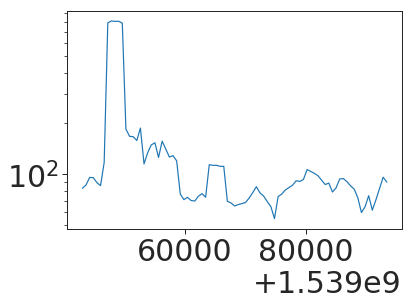

In [39]:
f, ax = plt.subplots()
ax.plot(df['boCorr_LF_B1'][df['boCorr_LF_B1']>0].rolling(5).mean())
ax.semilogy()

In [33]:
df['boCorr_LF_B1'][df['boCorr_LF_B1']<0]= np.nan

In [30]:
mlf = lifet_woBO_h_B1[:,96]
mlf[mlf<0] = 200
mlf[mlf>500] = 500


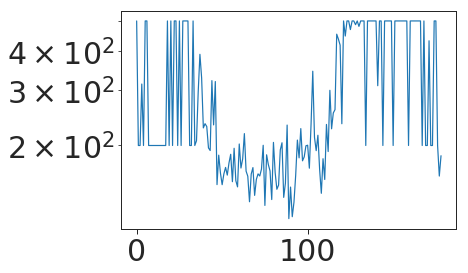

In [32]:
plt.semilogy(mlf)

In [28]:
ndf.columns

Index([u'timestamp', u'index', u'xing', u'betastar', u'chromaticity',
       u'octupole', u'onLHCb', u'B1H_TUNE', u'B1V_TUNE', u'B2H_TUNE',
       u'B2V_TUNE', u'bunch', u'fill', u'b1_intensity', u'b2_intensity',
       u'b1_emittance_conv', u'b2_emittance_conv', u'b1_lifetime',
       u'b2_lifetime', u'b1_bunchLength', u'b2_bunchLength', u'b1_nLR_IP1',
       u'b1_nLR_IP2', u'b1_nLR_IP8', u'b2_nLR_IP1', u'b2_nLR_IP2',
       u'b2_nLR_IP8'],
      dtype='object')

---------- FILL 7006 ----------
B1 slots               : 2412
B2 slots               : 2556
B1 colliding slots     : 2400
B2 colliding slots     : 2400
B1 non-colliding slots : 12
B2 non-colliding slots : 156


(0, 3564)

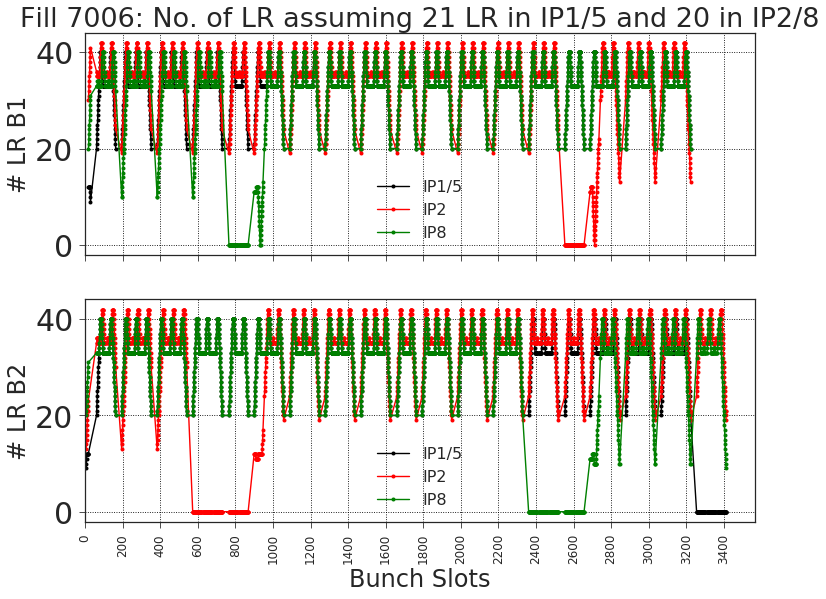

In [24]:
filln = 7006

filled_slots_b1, filled_slots_b2, slots_coll_b1, slots_coll_b2, slots_noncoll_b1, slots_noncoll_b2, b1_fill_pattern, b2_fill_pattern = getFillingScheme(filln)
BBMATRIX = bbFunctions.computeBBMatrix(nLR)
b1_collisionScheduleDF = bbFunctions.B1CollisionScheduleDF(b1_fill_pattern, b2_fill_pattern, nLR)
b2_collisionScheduleDF = bbFunctions.B2CollisionScheduleDF(b1_fill_pattern, b2_fill_pattern, nLR)
# Collides in IP2
# -- B1
b1_collisionScheduleDF['collidesIP2'] = b1_collisionScheduleDF["HO partner in ALICE"].fillna(-1)
b1_collisionScheduleDF['collidesIP2'][b1_collisionScheduleDF['collidesIP2']>=0] = 2
# -- B2
b2_collisionScheduleDF['collidesIP2'] = b2_collisionScheduleDF["HO partner in ALICE"].fillna(-1)
b2_collisionScheduleDF['collidesIP2'][b2_collisionScheduleDF['collidesIP2']>=0] = 2
# Collides in IP8
# -- B1
b1_collisionScheduleDF['collidesIP8'] = b1_collisionScheduleDF["HO partner in LHCB"].fillna(-1)
b1_collisionScheduleDF['collidesIP8'][b1_collisionScheduleDF['collidesIP8']>=0] = 3
# -- B2
b2_collisionScheduleDF['collidesIP8'] = b2_collisionScheduleDF["HO partner in LHCB"].fillna(-1)
b2_collisionScheduleDF['collidesIP8'][b2_collisionScheduleDF['collidesIP8']>=0] = 3
# Collides in IP1/5
# -- B1
b1_collisionScheduleDF['collidesIP1'] = b1_collisionScheduleDF["HO partner in ATLAS/CMS"].fillna(-1)
b1_collisionScheduleDF['collidesIP1'][b1_collisionScheduleDF['collidesIP1']>=0] = 1
# -- B2
b2_collisionScheduleDF['collidesIP1'] = b2_collisionScheduleDF["HO partner in ATLAS/CMS"].fillna(-1)
b2_collisionScheduleDF['collidesIP1'][b2_collisionScheduleDF['collidesIP1']>=0] = 1
####--------------
b1_slots_coll = b1_collisionScheduleDF.index.values
b2_slots_coll = b2_collisionScheduleDF.index.values
b1_coll_IP8   = b1_collisionScheduleDF['# of LR in LHCB'].values
b2_coll_IP8   = b2_collisionScheduleDF['# of LR in LHCB'].values
b1_coll_IP2   = b1_collisionScheduleDF['# of LR in ALICE'].values
b2_coll_IP2   = b2_collisionScheduleDF['# of LR in ALICE'].values
b1_coll_IP1   = b1_collisionScheduleDF['# of LR in ATLAS/CMS'].values
b2_coll_IP1   = b2_collisionScheduleDF['# of LR in ATLAS/CMS'].values

f = plt.figure(figsize=(12,9))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex=ax1, sharey=ax1)

ax1.plot(b1_slots_coll, b1_coll_IP1, 'k.-' , label='IP1/5', markersize=8)
ax1.plot(b1_slots_coll, b1_coll_IP2, 'r.-' , label='IP2', markersize=8)
ax1.plot(b1_slots_coll, b1_coll_IP8, 'g.-' , label='IP8', markersize=8)
ax1.grid('on')

ax2.plot(b2_slots_coll, b2_coll_IP1, 'k.-' , label='IP1/5', markersize=8)
ax2.plot(b2_slots_coll, b2_coll_IP2, 'r.-' , label='IP2', markersize=8)
ax2.plot(b2_slots_coll, b2_coll_IP8, 'g.-' , label='IP8', markersize=8)
ax2.grid('on')

ax1.set_ylabel("# LR B1")
ax2.set_ylabel("# LR B2")
ax1.legend()
ax2.legend()
ax2.set_xlabel("Bunch Slots")
ax1.set_title("Fill 7006: No. of LR assuming 21 LR in IP1/5 and 20 in IP2/8", fontsize=27)
setAxisMaxLocator(ax1, 'x', 20)
plt.setp(ax1.get_xticklabels(), rotation=90, fontsize=12, visible=False);
plt.setp(ax2.get_xticklabels(), rotation=90, fontsize=12);
ax1.set_xlim(0, 3564)

(0, 3564)

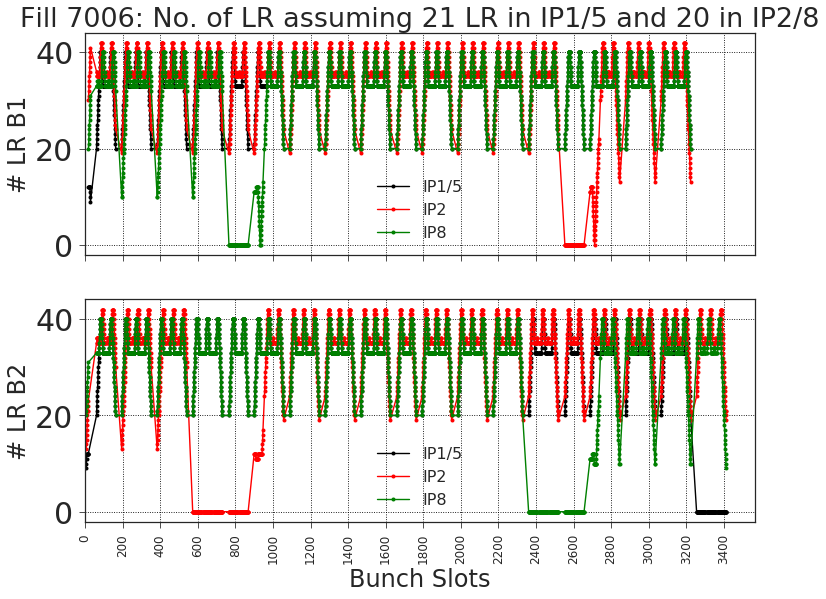

In [23]:
f = plt.figure(figsize=(12,9))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex=ax1, sharey=ax1)

ax1.plot(b1_slots_coll_fBCMS2017, b1_coll_IP1_fBCMS2017, 'k.-' , label='IP1/5', markersize=8)
ax1.plot(b1_slots_coll_fBCMS2017, b1_coll_IP2_fBCMS2017, 'r.-' , label='IP2', markersize=8)
ax1.plot(b1_slots_coll_fBCMS2017, b1_coll_IP8_fBCMS2017, 'g.-' , label='IP8', markersize=8)
ax1.grid('on')

ax2.plot(b2_slots_coll_fBCMS2017, b2_coll_IP1_fBCMS2017, 'k.-' , label='IP1/5', markersize=8)
ax2.plot(b2_slots_coll_fBCMS2017, b2_coll_IP2_fBCMS2017, 'r.-' , label='IP2', markersize=8)
ax2.plot(b2_slots_coll_fBCMS2017, b2_coll_IP8_fBCMS2017, 'g.-' , label='IP8', markersize=8)
ax2.grid('on')



# plt.xlabel("Bunch Slot [25 ns]")
ax1.set_ylabel("# LR B1")
ax2.set_ylabel("# LR B2")
# plt.title("B2 8b4e 2017 Encounter Selection", fontsize=30)
ax1.legend()
ax2.legend()
# # plt.xlim(300,300)
ax2.set_xlabel("Bunch Slots")

# plt.xlim(150,330)


ax1.set_title("Fill 7006: No. of LR assuming 21 LR in IP1/5 and 20 in IP2/8", fontsize=27)
setAxisMaxLocator(ax1, 'x', 20)
plt.setp(ax1.get_xticklabels(), rotation=90, fontsize=12, visible=False);
plt.setp(ax2.get_xticklabels(), rotation=90, fontsize=12);
ax1.set_xlim(0, 3564)